# 🚲 Yulu - Hypothesis Testing 📊

### **About Yulu 🚲**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the
daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu
provides the safest commute solution through a user-friendly mobile app to enable shared,
solo and sustainable commuting. </br>
Yulu zones are located at all the appropriate locations (including metro stations, bus
stands, office spaces, residential areas, corporate offices, etc) to make those first and last
miles smooth, affordable, and convenient! </br>
Yulu has recently suffered considerable dips in its revenues. They have contracted a
consulting company to understand the factors on which the demand for these shared
electric cycles depends. Specifically, they want to understand the factors affecting the
demand for these shared electric cycles in the Indian market.

### **Yulu - Data Overview** 🚴‍♂️  

##### **Dataset Description** 🚲

The dataset provided contains entries related to the usage of Yulu's shared electric cycles. It captures various environmental, temporal, and user-specific data points that are likely to influence the demand for these cycles. Each entry logs details from different days, covering weather conditions, temperatures, and user engagement metrics.

##### **Features of the Yulu Dataset:**

- **datetime**: The date and time when the data was recorded.
- **season**: Categorical data representing the season:  
  - 1: Spring  
  - 2: Summer  
  - 3: Fall  
  - 4: Winter  
- **holiday**: Indicates whether the day is a holiday (0 for no, 1 for yes).
- **workingday**: Indicates if the day is a working day (1 if the day is neither a weekend nor a holiday, otherwise 0).
- **weather**: Describes the weather conditions:  
  - 1: Clear, few clouds, partly cloudy.  
  - 2: Mist + cloudy conditions, such as broken clouds or few clouds.  
  - 3: Light snow, or light rain with thunderstorms and scattered clouds.  
  - 4: Heavy rain, ice pellets, thunderstorms with mist, or snow with fog.  
- **temp**: The actual temperature in Celsius recorded during the cycle rental.
- **atemp**: The "feels like" temperature in Celsius.
- **humidity**: The humidity percentage at the time of data logging.
- **windspeed**: The wind speed in meters per second.
- **casual**: The count of casual users (non-registered) renting bikes.
- **registered**: The count of registered users renting bikes.
- **count**: The total count of all rental bikes, including both casual and registered users.



## **A) Define Problem Statement and perform Exploratory Data Analysis**

### **1. Definition of problem**

Yulu is aiming to tackle a significant revenue downturn by thoroughly analyzing the factors affecting the demand for its shared electric cycles in the Indian market. The approach is divided into three key areas:

#### **Objective:**
1. Identify which variables significantly influence the demand for electric cycles.
2. Analyze how these variables correlate with the demand patterns observed.

#### **Focus:**
##### **Significant Variables Identification:**
- **Weather Conditions**: Impact of various weather conditions on cycle usage.
- **Time of Day**: Usage rates during different times of the day.
- **User Demographics**: Effects of user attributes like age and occupation on demand.
- **Location Proximity**: Influence of cycle station proximity to transit points and urban centers.
- **Day Type**: Demand variation on working days versus weekends and holidays.

##### **Variable Impact Analysis:**
- Conduct correlation studies and predictive analysis to understand how these factors collectively impact demand.

#### **Outcome:**
- Utilize the findings from the analysis to refine marketing strategies and operational adjustments.
- Enhance service offerings and operational efficiency based on identified demand drivers.
- Ultimately, reverse the trend of declining revenues by aligning service delivery with market demands more effectively.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import scipy.stats as stats
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

In [2]:
!gdown 1YN-BpDAC7Q0AffMiTAmVrynwLowaTrOd

Downloading...
From: https://drive.google.com/uc?id=1YN-BpDAC7Q0AffMiTAmVrynwLowaTrOd
To: /content/yulu_dataset.txt
100% 648k/648k [00:00<00:00, 26.2MB/s]


In [3]:
df = pd.read_csv('yulu_dataset.txt', on_bad_lines='warn')

In [4]:
print("First 5 rows of the dataset:\n")
df.head()

First 5 rows of the dataset:



datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

#### **Basic metrics**

Basic metrics include:

- **Number of records and attributes** in the dataset.
- **Data types** of columns.
- **Count of unique values**.
- **Presence of missing values**.

In [5]:
# Basic information about the dataset

In [6]:
print("Basic Information about the dataset:\n")
df.info()

Basic Information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
# Shape of the dataset

In [8]:
print("Shape of the dataset:")
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

Shape of the dataset:
Number of rows: 10886, Number of columns: 12


In [9]:
# Checking for missing values

In [10]:
print("Missing Values Count:\n")
print(df.isnull().sum())

Missing Values Count:

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [11]:
# Count of unique values in each column

In [12]:
print("Unique Value Count in Each Column:\n")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Unique Value Count in Each Column:

datetime: 10886 unique values
season: 4 unique values
holiday: 2 unique values
workingday: 2 unique values
weather: 4 unique values
temp: 49 unique values
atemp: 60 unique values
humidity: 89 unique values
windspeed: 28 unique values
casual: 309 unique values
registered: 731 unique values
count: 822 unique values


#### **Insights from Basic Metrics**

###### **Shape & Size**  
- **Entries**: The dataset consists of **10,886 rows**, each representing individual records of cycle usage.  
- **Columns**: There are **12 columns** in total, detailing various aspects that could influence cycle rental demand.  

###### **Data Types**  
- **Temporal Data**: The **'datetime'** field is of type **object** (string) and should be converted to a **datetime** type for time-series analysis.  
- **Numerical Data**: Includes both **integers** (e.g., **'season'**, **'holiday'**, **'workingday'**, **'weather'**, **'humidity'**) and **floats** (**'temp'**, **'atemp'**, **'windspeed'**, **'casual'**, **'registered'**, **'count'**), facilitating direct quantitative analysis.  
- **Categorical Data**: Fields like **'season'**, **'holiday'**, **'workingday'**, and **'weather'** represent categorical data encoded as integers.  

###### **Missing Data**  
- **Complete Dataset**: There are **no missing values** across all 12 columns, which means there's no need for data imputation, simplifying the preprocessing steps.  

###### **Unique Values**  
- **High Variability**: Variables like **'temp'**, **'atemp'**, **'humidity'**, **'windspeed'**, **'casual'**, **'registered'**, and **'count'** show a broad range of values, indicating diverse conditions and user engagement.  
- **Limited Categories**: Categorical variables such as **'season'**, **'holiday'**, **'workingday'**, and **'weather'** have a small set of unique values, suitable for grouping and comparison analyses.  

###### **Key Observations**  
- **Diverse User Engagement**: The significant number of unique counts in **'casual'**, **'registered'**, and **'total count'** underscores varied user engagement levels, from occasional to frequent renters.  
- **Potential for Time Series Analysis**: The unique **timestamp** for each entry suggests the data is suitable for **time series analysis** to uncover trends over time.  
- **Impact of Environmental Factors**: The detailed recording of **weather conditions** and **temperatures** points to the potential impact of environmental factors on cycle usage, which can be quantitatively assessed.  

This comprehensive overview helps in understanding the dataset’s utility for performing detailed analysis aimed at enhancing **operational strategies** and **customer service** for Yulu.

---

### **2. Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.**

#### **2.1 Observations on the Shape of Data**

In [13]:
# Observing the shape of the dataset

In [14]:
print("Number of records (rows):", df.shape[0])
print("Number of attributes (columns):", df.shape[1])

Number of records (rows): 10886
Number of attributes (columns): 12


#### **2.2 Data Types of All Attributes**

In [15]:
# Displaying data types

In [16]:
print("Data types of each column before conversion:")
print(df.dtypes)

Data types of each column before conversion:
datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


In [17]:
# Count of unique data types

In [18]:
print("Unique Data Types Count: \n")
print(df.dtypes.value_counts())

Unique Data Types Count: 

int64      8
float64    3
object     1
Name: count, dtype: int64


#### **2.3  Conversion of Categorical Attributes to 'Category'**

In [19]:
# Columns that we want to treat as categorical
categorical_cols = ['season', 'holiday', 'workingday', 'weather']

# Convert the identified columns to the 'category' data type
df[categorical_cols] = df[categorical_cols].astype('category')

print("Data types of each selected categorical column after conversion:\n")
print(df.dtypes[categorical_cols])

Data types of each selected categorical column after conversion:

season        category
holiday       category
workingday    category
weather       category
dtype: object


In [20]:
print("Data types of all columns after conversion:\n")
print(df.dtypes)

Data types of all columns after conversion:

datetime        object
season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
dtype: object


#### **2.4  Missing Value Detection**

In [21]:
# Counting missing values
missing_values = df.isnull().sum()

In [22]:
# Percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

In [23]:
# Displaying missing value statistics
print("Missing Values:\n", missing_values)
print("\nPercentage of Missing Values:\n", missing_percentage)

Missing Values:
 datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Percentage of Missing Values:
 datetime      0.0
season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
count         0.0
dtype: float64


#### **2.5 Statistical Summary**

In [24]:
# For numeric columns
print("Statistical summary for numeric attributes:\n")
print(df.describe())

Statistical summary for numeric attributes:

              temp         atemp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395     36.021955   
std        7.79159      8.474601     19.245033      8.164537     49.960477   
min        0.82000      0.760000      0.000000      0.000000      0.000000   
25%       13.94000     16.665000     47.000000      7.001500      4.000000   
50%       20.50000     24.240000     62.000000     12.998000     17.000000   
75%       26.24000     31.060000     77.000000     16.997900     49.000000   
max       41.00000     45.455000    100.000000     56.996900    367.000000   

         registered         count  
count  10886.000000  10886.000000  
mean     155.552177    191.574132  
std      151.039033    181.144454  
min        0.000000      1.000000  
25%       36.000000     42.000000  
50%      118.000000    145.000000  


In [25]:
# Before preprocessing, it's beneficial to review the statistical summary for categorical attributes.
# Using include='category' in the describe method helps to retrieve essential statistics such as count,
# unique, top, and frequency for categorical data.

print("Statistical summary for categorical attributes before preprocessing:\n")
print(df.describe(include='category'))

Statistical summary for categorical attributes before preprocessing:

        season  holiday  workingday  weather
count    10886    10886       10886    10886
unique       4        2           2        4
top          4        0           1        1
freq      2734    10575        7412     7192


#### **Insights**  

###### **Overview of Dataset Structure :-**  
- **Total Entries**: **10,886 records**, showing extensive data on cycle usage.  
- **Attributes**: **12 distinct attributes** ranging from time and weather conditions to user types and cycle usage counts.  

###### **Data Composition and Types :-**  

**Data Types Before Conversion:**  
- Most columns are **numeric** (**integers** and **floats**), ideal for **quantitative analysis**.  
- The **'datetime'** column is initially in **object format**, suitable for conversion to **datetime** for time series analysis.  

**Data Types After Conversion:**  
- **'season'**, **'holiday'**, **'workingday'**, and **'weather'** have been converted to **categories**, reducing **memory usage** and clarifying their role as **fixed, nominal types**.  

###### **Data Integrity :-**  
- **No Missing Values**: The dataset is **complete** with **zero missing entries** across all columns, indicating **high data quality** and **reliability** for analysis.  
- **Percentage of Missing Values**: Consistently **0%** across all fields, reinforcing the dataset’s **readiness for analysis** without the need for **data imputation**.  

###### **Statistical Summary :-**  

**Numeric Attributes:**  
- Variables like **'temp'**, **'atemp'**, **'humidity'**, **'windspeed'**, **'casual'**, **'registered'**, and **'count'** show a **wide range of values**, suggesting **varied conditions** and **usage patterns**.  
- Key metrics such as **mean, standard deviation, and ranges** provide insights into **typical weather conditions** and **user engagement levels**.  

**Categorical Attributes (Before Preprocessing):**  
- **Basic counts** and **frequency distributions** for **'season'**, **'holiday'**, **'workingday'**, and **'weather'** offer a snapshot of the **conditions under which cycles are used most frequently**.  

###### **Key Observations :-**  
- **Usage Variability**: The data shows a **significant variance** in the **number of cycles rented daily**, indicating **fluctuating demand** influenced by several factors.  
- **Weather and Seasonality**: The diversity in **weather** and **seasonal conditions** captured in the dataset suggests **potential impacts on cycle usage patterns** that merit deeper analysis.  
- **User Types**: The distinction between **casual** and **registered users** in the usage counts suggests **different patterns of engagement**, which could inform **targeted marketing** and **service adjustments**.  

This straightforward summary provides a **foundational understanding** of the dataset’s **characteristics** and **potential areas of interest** for further **detailed analysis** aimed at **improving Yulu’s services** and addressing its **business challenges**.  

---

### **3. Preprocessing of the Yulu Dataset & Non-Graphical Analysis**

#### **3.1 Preprocessing of the Yulu Dataset for Enhanced Analysis with Statistical Summary**

In [26]:
# Save the original dataset
df_raw = df.copy()

# Define mappings for readability
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_labels = {
    1: 'Clear/Partly Cloudy',  # Includes Clear, Few Clouds, Partly Cloudy
    2: 'Mist/Cloudy',  # Includes Mist + Cloudy, Mist + Broken Clouds, Mist + Few Clouds
    3: 'Light Snow/Rain',  # Includes Light Snow, Light Rain + Thunderstorm + Scattered Clouds, Light Rain + Scattered Clouds
    4: 'Heavy Rain/Snow/Fog'  # Includes Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog
}

working_labels = {1: "Working", 0: "Non-Working"}
holiday_labels = {1: "Holiday", 0: "Non-Holiday"}

# Convert categories with labels
df['season'] = df['season'].map(season_labels)
df['weather'] = df['weather'].map(weather_labels)
df['workingday'] = df['workingday'].map(working_labels)
df['holiday'] = df['holiday'].map(holiday_labels)

# Separate date and time from datetime
df['date'] = pd.to_datetime(df["datetime"]).dt.date
df['time'] = pd.to_datetime(df["datetime"]).dt.time

# # Drop the original 'datetime' column
# df.drop(columns='datetime', inplace=True)

# Renaming 'count' column to 'total_rentals'
df.rename(columns={"count": "total_rentals"}, inplace=True)

# Data validation
assert df['season'].isin(season_labels.values()).all(), "Season contains invalid values"
assert df['weather'].isin(weather_labels.values()).all(), "Weather contains invalid values"
assert df['workingday'].isin(working_labels.values()).all(), "Workingday contains invalid values"
assert df['holiday'].isin(holiday_labels.values()).all(), "Holiday contains invalid values"

# Check numeric ranges
assert df['temp'].between(-30, 50).all(), "Temperature contains out-of-range values"
assert df['humidity'].between(0, 100).all(), "Humidity contains out-of-range values"

# View processed dataframe
df.head()

datetime  season      holiday   workingday              weather  \
0  2011-01-01 00:00:00  Spring  Non-Holiday  Non-Working  Clear/Partly Cloudy   
1  2011-01-01 01:00:00  Spring  Non-Holiday  Non-Working  Clear/Partly Cloudy   
2  2011-01-01 02:00:00  Spring  Non-Holiday  Non-Working  Clear/Partly Cloudy   
3  2011-01-01 03:00:00  Spring  Non-Holiday  Non-Working  Clear/Partly Cloudy   
4  2011-01-01 04:00:00  Spring  Non-Holiday  Non-Working  Clear/Partly Cloudy   

   temp   atemp  humidity  windspeed  casual  registered  total_rentals  \
0  9.84  14.395        81        0.0       3          13             16   
1  9.02  13.635        80        0.0       8          32             40   
2  9.02  13.635        80        0.0       5          27             32   
3  9.84  14.395        75        0.0       3          10             13   
4  9.84  14.395        75        0.0       0           1              1   

         date      time  
0  2011-01-01  00:00:00  
1  2011-01-01  01:00:00  
2  2011-01-01  02:00:00  
3  2011-01-01  03:00:00  
4  2011-01-01  04:00:00

In [27]:
print("Statistical summary for categorical attributes after preprocessing:\n")
print(df.describe(include='category'))

Statistical summary for categorical attributes after preprocessing:

        season      holiday workingday              weather
count    10886        10886      10886                10886
unique       4            2          2                    4
top     Winter  Non-Holiday    Working  Clear/Partly Cloudy
freq      2734        10575       7412                 7192


#### **Insights on Statistical summary of Categorical attributes after preprocessing in the Dataset**  

###### **Distribution of Seasons:**  
- **Most Frequent Season**: **Winter** appears most frequently in the dataset, with **2,734 occurrences**.  
- **Variety**: There are **four distinct seasons recorded**, illustrating a **year-round analysis** of the data.  

###### **Holiday Observations:**  
- **Working Days Predominate**: The dataset primarily consists of **non-holiday days**, with **10,575 out of 10,886** marked as **non-holidays**.  
- **Implication**: This suggests the data is largely **representative of typical working conditions**, potentially **affecting patterns like rentals or traffic**.  

###### **Working Day Distribution:**  
- **Majority Working Days**: A **significant majority** of the data points (**7,412**) are on **working days**.  
- **Analysis Focus**: Any **business impact or daily routine analysis** should **prioritize working days**, as they are more **frequent**.  

###### **Weather Conditions:**  
- **Most Common Weather**: **'Clear/Partly Cloudy'** is the **most common weather condition**, reported on **7,192 occasions**.  
- **Weather Diversity**: The data features **four types of weather conditions**, indicating **varied environmental factors** that could influence **cycle rentals or outdoor activities**.  

The dataset captures a **year-round distribution**, with a predominance of **working days** and **clear weather conditions**. This setup is **ideal for analyzing weather and workday impacts** on urban activities and transportation planning.  

#### **3.2 Non-Graphical Analysis: Value counts and unique attributes**

#### **3.2.1 Value Counts**

#### Value counts show the frequency of each unique value in categorical columns, helping to understand the distribution of categories in the dataset.

In [28]:
# Identifying categorical columns dynamically
categorical_columns = df.select_dtypes(include=['category']).columns

# Printing value counts for each categorical column with a separator after each, except not after the last
for i, col in enumerate(categorical_columns):
    print(f"Value Counts for {col}:\n{df[col].value_counts()}\n")
    # Print separator after every column output, except not after the last one
    if i != len(categorical_columns) - 1:
        print("--------\n")

Value Counts for season:
season
Winter    2734
Summer    2733
Fall      2733
Spring    2686
Name: count, dtype: int64

--------

Value Counts for holiday:
holiday
Non-Holiday    10575
Holiday          311
Name: count, dtype: int64

--------

Value Counts for workingday:
workingday
Working        7412
Non-Working    3474
Name: count, dtype: int64

--------

Value Counts for weather:
weather
Clear/Partly Cloudy    7192
Mist/Cloudy            2834
Light Snow/Rain         859
Heavy Rain/Snow/Fog       1
Name: count, dtype: int64



#### **Insights from Value Counts**  

###### **Seasonal Distribution of Rentals:**  
- **Winter and Summer** have the **highest rental counts**, each with **over 2,700 rentals**, indicating these seasons might have **more favorable weather conditions for cycling**.  
- **Spring sees slightly fewer rentals** compared to other seasons, which might suggest **transitional weather that's less ideal for bike use**.  

###### **Impact of Holidays on Rentals:**  
- The **vast majority of rentals occur on non-holidays**, with **over 10,000 instances**, suggesting that **regular days sustain consistent bike usage**.  
- **Holidays see significantly fewer rentals**, with only **311 counts**, possibly due to **people traveling** or participating in **other non-cycling holiday activities**.  

###### **Working Day Influence:**  
- **Working days experience more than double the bike rentals** compared to non-working days, highlighting a **strong commuter or routine-based usage** during **regular work schedules**.  
- **Non-working days have considerably lower rental activity**, which might reflect a **different pattern of leisurely use** or **less need to travel**.  

###### **Weather Conditions and Rentals:**  
- **Clear or partly cloudy days** see the **highest number of rentals**, with **over 7,000 counts**, indicating that **favorable weather significantly boosts cycling activity**.  
- **Severe weather conditions** like **heavy rain, snow, or fog** are **extremely rare** but **drastically reduce rentals**, with only **1 count**, underlining **safety or comfort concerns**.  

###### **Variability with Light Adverse Weather:**  
- **Mist and cloudy conditions** result in a **moderate decrease in rentals**, with about **2,800 counts**, suggesting **slight discomfort or reduced enthusiasm for cycling**.  
- **Light snow or rain** has a **noticeable impact**, reducing rentals to **under 900**, which may indicate that **only the more committed cyclists venture out under such conditions**.  

These insights highlight how **seasonal changes, holiday occurrences, working day routines, and varying weather conditions** influence the **frequency of bike rentals**.  

#### **3.2.2 Unique Attributes**

#### Let's examine the unique values in each column to understand the diversity and variety within the dataset.

In [29]:
# Count of unique values in each column using nunique()
print("Count of unique values in each column:")
print(df.nunique())

Count of unique values in each column:
datetime         10886
season               4
holiday              2
workingday           2
weather              4
temp                49
atemp               60
humidity            89
windspeed           28
casual             309
registered         731
total_rentals      822
date               456
time                24
dtype: int64


In [30]:
# Actual unique values for each categorical column using unique()
for i, col in enumerate(categorical_cols):
    if i > 0:
        print()
    print(f"Unique values in '{col}':")
    print(df[col].unique())

Unique values in 'season':
['Spring', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Spring', 'Summer', 'Fall', 'Winter']

Unique values in 'holiday':
['Non-Holiday', 'Holiday']
Categories (2, object): ['Non-Holiday', 'Holiday']

Unique values in 'workingday':
['Non-Working', 'Working']
Categories (2, object): ['Non-Working', 'Working']

Unique values in 'weather':
['Clear/Partly Cloudy', 'Mist/Cloudy', 'Light Snow/Rain', 'Heavy Rain/Snow/Fog']
Categories (4, object): ['Clear/Partly Cloudy', 'Mist/Cloudy', 'Light Snow/Rain', 'Heavy Rain/Snow/Fog']


#### **Insights from Unique Attributes**  

###### **Temporal Data Depth:**  
- The **'datetime' column** has **10,886 unique entries**, indicating that the dataset **covers a comprehensive range of dates and times**, ideal for **detailed time series analysis**.  
- There are **24 unique 'hour' and 'time' values**, suggesting that **data is recorded hourly**, providing **granularity for analyzing usage patterns throughout the day**.  

###### **Environmental and Seasonal Variation:**  
- **Four distinct seasons** are represented in the dataset, allowing for analysis of **how seasonal changes impact bike rental behaviors**.  
- **Weather conditions** are categorized into **four types**, ranging from **clear conditions to heavy rain/snow/fog**, highlighting **potential impacts on rental frequency due to weather variations**.  

###### **User Types and Usage Patterns:**  
- There are **309 unique counts of 'casual' users** and **731 counts for 'registered' users**, indicating a **richer engagement or higher frequency of use among registered users**.  
- **Total rentals** have **822 unique counts**, showing **significant variability** in rental activity, which can be **correlated with external factors like weather and seasons**.  

###### **Date and Time Specifics:**  
- The dataset spans **456 unique dates**, reflecting a **wide temporal scope** that can help in **understanding long-term rental trends**.  
- **Month and year data** are combined into **24 unique 'month_year' entries**, simplifying **seasonal and annual trend analysis** in bike rentals.  

###### **Special Conditions (Holiday and Working Days):**  
- The distinction between **'Holiday' and 'Non-Holiday'** as well as **'Working' and 'Non-Working' days**, each with only **two categories**, allows for **focused analysis on how public holidays and regular workdays affect rental patterns**.  
- There's a clear opportunity to **explore how special days versus regular days influence user behavior**, with potential insights into **how holidays and work routines impact demand for bike rentals**.  

These insights lay the foundation for **targeted analyses**, such as **the impact of environmental conditions on bike usage, daily and seasonal trends, and differences in behavior between casual and registered users**. Each point serves as a **gateway to deeper statistical analysis and strategic planning** based on **user engagement and external factors**.  

---

### **4. Univariate & Bivariate Analysis**

#### **4.1 Univariate Analysis**

#### **4.1.1 What is the distribution of temperatures during which bikes are most frequently rented?**

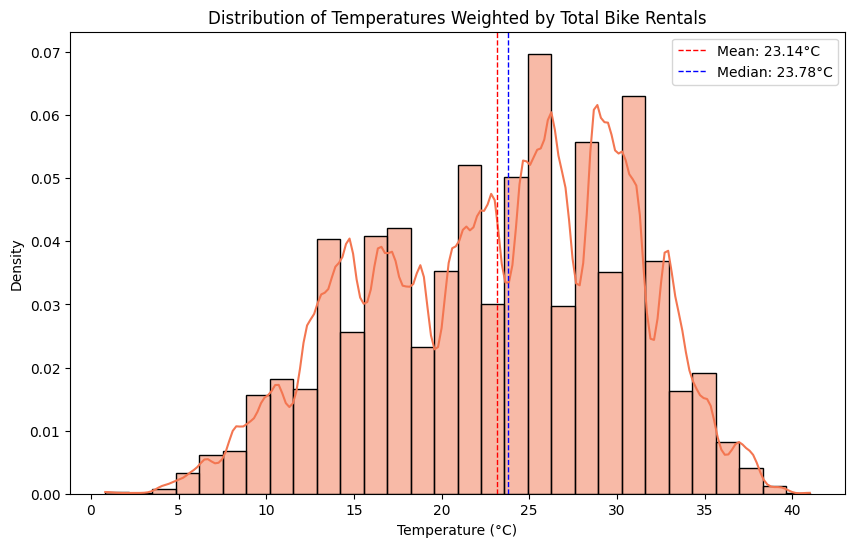

In [31]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Weighting temperatures by repeating them according to the total rentals
sampled_temp = df['temp'].repeat(df['total_rentals']).reset_index(drop=True)

# Calculate mean and median for the weighted temperatures
mean_temp = sampled_temp.mean()
median_temp = sampled_temp.median()

# Plot a histogram with Kernel Density Estimate
sns.histplot(sampled_temp, bins=30, kde=True, color=sns.color_palette("rocket_r")[1], element='bars', stat='density')

# Adding a vertical red dashed line at the mean temperature
plt.axvline(mean_temp, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_temp:.2f}°C')

# Adding a vertical green dashed line at the median temperature
plt.axvline(median_temp, color='blue', linestyle='dashed', linewidth=1, label=f'Median: {median_temp:.2f}°C')

# Adding title and labels
plt.title('Distribution of Temperatures Weighted by Total Bike Rentals')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')

# Adding legend
plt.legend()

# Show the plot
plt.show()

#### **Insights on Distribution of Temperatures Weighted by Total Bike Rentals**  

###### **Peak Rental Temperatures:**  
- **Ideal Riding Conditions**: The peak around **23-24°C** indicates **optimal biking conditions**, suggesting **user preference** for mild, comfortable weather.  
- **Service Optimization**: Bike rental services can enhance **availability** and **promotional activities** during these temperatures to **maximize user engagement**.  

###### **Spread and Skewness:**  
- **Preference Distribution**: The **right-skewed distribution** indicates a **preference for warmer** over cooler temperatures, with **frequent rentals** still occurring up to about **30°C**.  
- **Heat Sensitivity**: As temperatures **rise beyond 30°C**, the **frequency of rentals declines**, suggesting **reduced comfort** or **increased health risks**.  

###### **Central Tendencies:**  
- **Symmetric Core**: The closeness of the **mean (23.14°C)** and **median (23.78°C)** in the densest part of the histogram suggests a **symmetric distribution** around central temperature values.  
- **Reliable Forecasting**: This **tight clustering** can aid businesses in **reliably forecasting** peak rental times based on **average temperature forecasts**.  

###### **Lower Temperature Rentals:**  
- **Minimum Threshold**: Rentals **increase as temperatures rise past 10°C**, indicating a **lower comfort threshold** for users starting their rides.  
- **Seasonal Adjustments**: This insight can guide **seasonal staffing** and **fleet management**, with **increased readiness** as temperatures climb in **spring**.  

###### **High Temperature Drop-off:**  
- **Declining Interest**: A **noticeable decline** in rentals past **30°C** could indicate **discomfort** or **health advisories** impacting **user behavior**.  
- **Adaptive Marketing**: This trend suggests the potential for **marketing alternative, cooler times of day** for rentals during **heatwaves**.  

These insights provide **actionable points** for businesses and highlight **temperature-dependent user behaviors** clearly reflected in the graph.  

#### **4.1.2 How quickly does rental frequency accumulate as 'feels like' temperature increases?**

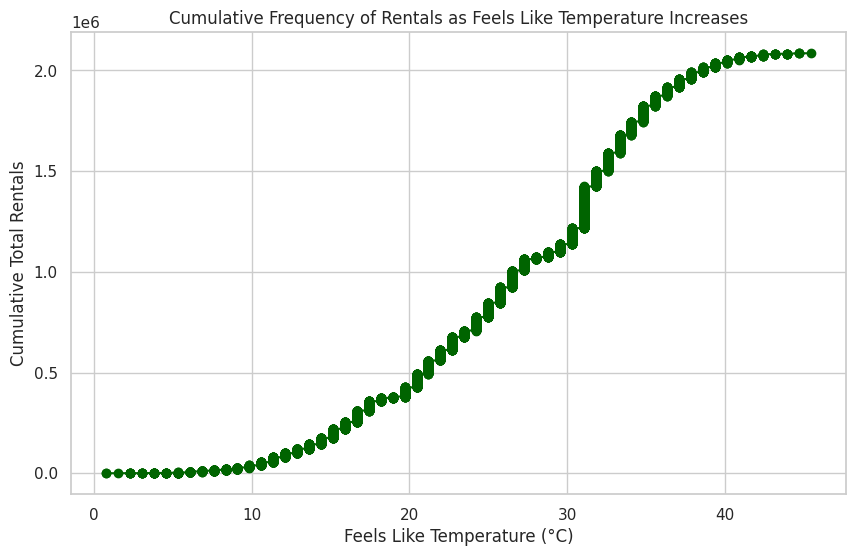

In [32]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Sorting data by 'atemp' to ensure the cumulative sum is calculated correctly over increasing temperatures
df_sorted = df.sort_values(by='atemp')

# Calculate the cumulative sum of total rentals to see how rentals accumulate as temperature increases
df_sorted['cumulative_rentals'] = df_sorted['total_rentals'].cumsum()

# Set up the plot with a figure size of 10 inches by 6 inches for better visibility
plt.figure(figsize=(10, 6))

# Plotting the cumulative frequency plot with a dark green color for the line
plt.plot(df_sorted['atemp'], df_sorted['cumulative_rentals'], marker='o', linestyle='-', color='darkgreen')

# Adding a title to the plot for better context
plt.title('Cumulative Frequency of Rentals as Feels Like Temperature Increases')

# Labeling the x-axis to indicate what the numbers represent
plt.xlabel('Feels Like Temperature (°C)')

# Labeling the y-axis to show the metric being plotted
plt.ylabel('Cumulative Total Rentals')

# Enabling grid lines for easier reading of values
plt.grid(True)

# Display the plot
plt.show()


#### **Insights on Cumulative Frequency of Rentals as Feels Like Temperature Increases**  

###### **Initial Accumulation:**  
- **Slow Start**: The plot shows a **gradual increase** in rentals at **lower temperatures**, suggesting that **cooler conditions** are **less favorable** for biking.  
- **Threshold Behavior**: The gentle **slope up to about 10°C** indicates that **few rentals occur** below this temperature, possibly due to **discomfort** or **adverse weather conditions**.  

###### **Mid-Range Temperature Response:**  
- **Steady Increase**: From approximately **10°C to 20°C**, there is a **consistent and linear increase** in rental frequency, suggesting **increasing user activity** as temperatures become **more comfortable**.  
- **Popular Range**: This temperature range may represent the **most common conditions** for biking, where users **prefer outdoor activities**.  

###### **High Temperature Acceleration:**  
- **Rapid Growth**: Between **20°C and 30°C**, the curve **steepens significantly**, showing a **sharp increase** in cumulative rentals, indicating **peak rental activity**.  
- **Optimal Conditions**: This segment likely represents the most **ideal 'feels like' temperatures** for bike rentals, where the **majority of users** find the weather **perfect for biking**.  

###### **Near Maximum Temperature:**  
- **Plateau Approach**: As temperatures reach around **30°C**, the **rate of increase** in cumulative rentals begins to **plateau**, suggesting a **saturation point** where **nearly all potential renters** have been reached.  
- **Diminishing Returns**: This could indicate that beyond this point, **increases in temperature do not significantly boost rental numbers**, possibly due to **reaching a limit** on user **comfort or availability**.  

###### **Temperature Saturation:**  
- **Leveling Off**: Past **35°C**, the curve **flattens**, indicating that **rental frequency does not increase much** with further increases in temperature.  
- **Heat Aversion**: This leveling off suggests that **very high temperatures** may **deter bike usage**, possibly due to **heat discomfort** or **health concerns** related to outdoor exercise in high heat.  

These insights provide a **detailed understanding** of how **temperature affects bike rental frequency**, useful for **strategic planning** in **business operations** and **marketing for bike rental services**.  

#### **4.1.3 What are the extremes of humidity during which bike rentals are lowest?**

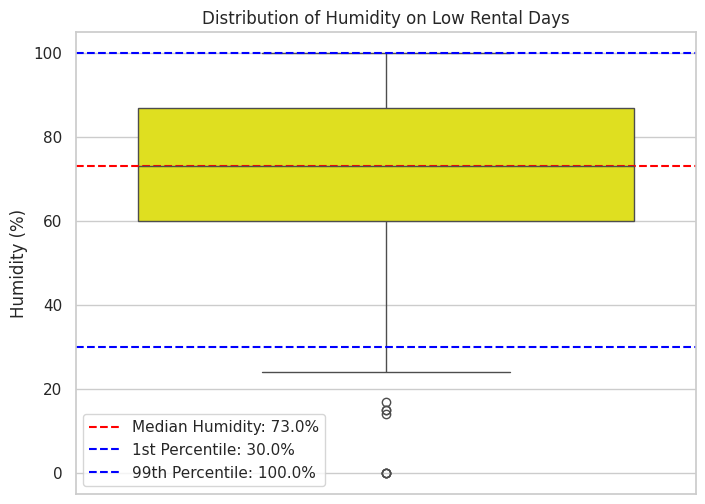

In [33]:
# Define low rental days as those in the lowest 10th percentile of total rentals
# This identifies days with significantly low bike rental activity
threshold = df['total_rentals'].quantile(0.10)
low_rental_days = df[df['total_rentals'] <= threshold]

# Set up the plot, specifying the figure size for better visibility
plt.figure(figsize=(8, 6))

# Create a box plot of humidity on low rental days, setting the color to yellow for visibility
sns.boxplot(y=low_rental_days['humidity'], color='yellow')

# Add a title to the plot to clearly describe the data being represented
plt.title('Distribution of Humidity on Low Rental Days')

# Label the y-axis to clearly indicate the variable being analyzed
plt.ylabel('Humidity (%)')

# Calculate the median, 1st, and 99th percentiles of humidity
median_humidity = low_rental_days['humidity'].median()
p1_humidity = low_rental_days['humidity'].quantile(0.01)
p99_humidity = low_rental_days['humidity'].quantile(0.99)

# Draw a red dashed line at the median humidity to highlight it
plt.axhline(median_humidity, color='red', linestyle='dashed', label=f'Median Humidity: {median_humidity}%')

# Draw blue dashed lines at the 1st and 99th percentiles to highlight these extremes
plt.axhline(p1_humidity, color='blue', linestyle='dashed', label=f'1st Percentile: {p1_humidity}%')
plt.axhline(p99_humidity, color='blue', linestyle='dashed', label=f'99th Percentile: {p99_humidity}%')

# Add a legend to help identify the colored dashed lines
plt.legend()

# Display the plot to visualize the distribution with percentile lines
plt.show()

#### **Insights on Distribution of Humidity on Low Rental Days**  

###### **Wide Range of Humidity:**  
- **Broad Distribution**: The box plot indicates a **very wide range of humidity levels** on days with **low rentals**, spanning from as low as **30% up to 100%**.  
- **High Variability**: This suggests that **bike rentals are not solely determined by humidity**, since **low rental days** occur across a **diverse range of humid conditions**.  

###### **Median Humidity:**  
- **Predominantly High**: The **median humidity** on **low rental days** is relatively **high at 73%**, suggesting that **moderately high humidity** is **typical on days with fewer rentals**.  
- **Less Influence**: Despite the **high median**, the presence of **rentals across a broad humidity spectrum** implies that **other factors** might be **more influential** in deterring renters.  

###### **Low Humidity Extremes:**  
- **Rarely Very Dry**: The **1st percentile at 30% humidity** shows that **very dry days** are **uncommon** among **low rental days**.  
- **Limited Impact**: This rarity suggests that **extremely low humidity** does not significantly **impact the decision to rent bikes**, possibly because it is **less physically deterring**.  

###### **High Humidity Extremes:**  
- **Frequent Saturation**: The **99th percentile reaching 100%** indicates that **fully saturated air**, which can be **uncomfortable and oppressive**, is a **common extreme** on **low rental days**.  
- **Potential Deterrent**: Such **high humidity** could deter bike rentals due to **discomfort from excessive sweat** and the **feeling of lethargy** that often accompanies **high humidity levels**.  

###### **Outliers and General Trends:**  
- **Outliers Present**: The **outliers** below the **1st percentile** and above the **99th** suggest there are **exceptional days** where **humidity conditions** are **extremely unusual**, yet **rentals remain low**.  
- **Broader Influence**: These outliers reinforce that while **humidity influences rental frequency**, it is likely **interplayed with other weather conditions** like **temperature** or **precipitation**, which also **affect rental decisions**.  

Each of these insights helps to **better understand how humidity interacts** with the behavior of **bike rentals**, indicating that **both extremely low and high humidity** can affect rentals, but often as **part of a combination of factors**.  

#### **4.1.4 What is the typical windspeed during high and low bike rental periods?**

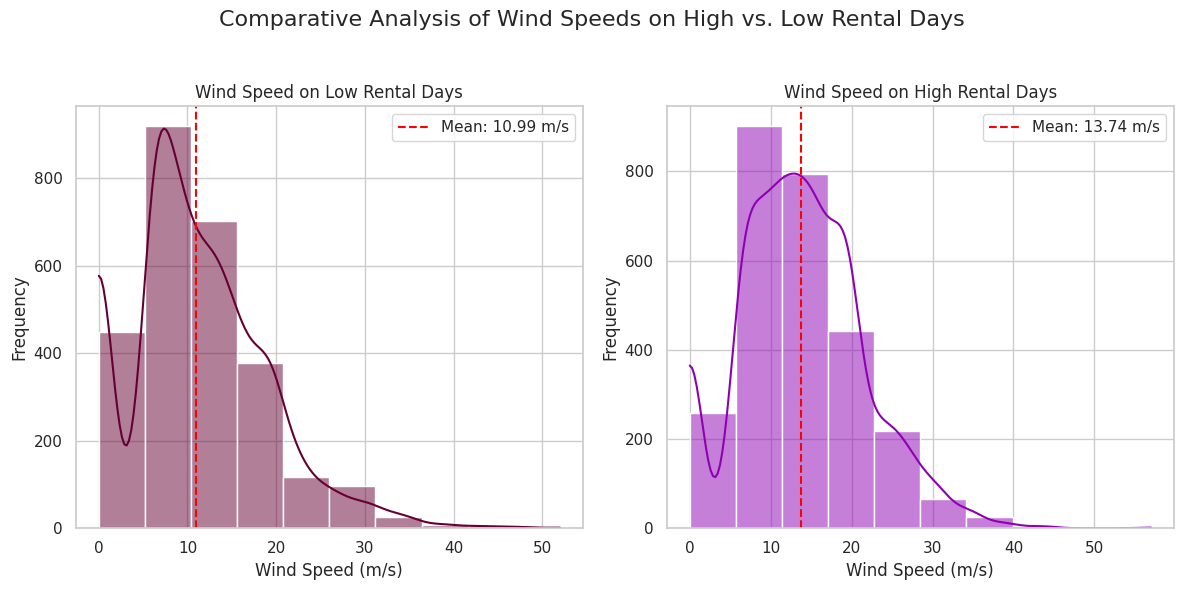

In [34]:
# Define high and low rental periods based on total rentals
# High rental periods are defined as those above the 75th percentile of total rentals
high_threshold = df['total_rentals'].quantile(0.75)

# Low rental periods are defined as those below the 25th percentile of total rentals
low_threshold = df['total_rentals'].quantile(0.25)

# Filter the dataset to identify high rental days
high_rental_days = df[df['total_rentals'] > high_threshold]

# Filter the dataset to identify low rental days
low_rental_days = df[df['total_rentals'] < low_threshold]

# Prepare the figure for plotting two histograms side by side
plt.figure(figsize=(12, 6))

# Plotting histogram for low rental days
plt.subplot(1, 2, 1)  # This specifies a 1 row and 2 column figure, targeting the first subplot
sns.histplot(low_rental_days['windspeed'], color='#660033', bins=10, kde=True)  # KDE included for density estimation
plt.title('Wind Speed on Low Rental Days')  # Setting the title for the histogram
plt.xlabel('Wind Speed (m/s)')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label

mean_low = low_rental_days['windspeed'].mean()  # Calculate the mean wind speed for low rental days

plt.axvline(mean_low, color='red', linestyle='dashed', label=f'Mean: {mean_low:.2f} m/s')  # Red dashed line for mean
plt.legend()  # Display the legend to identify the mean line

# Plotting histogram for high rental days
plt.subplot(1, 2, 2)  # Targeting the second subplot in the 1x2 layout
sns.histplot(high_rental_days['windspeed'], color='#8f00b3', bins=10, kde=True)  # KDE to show the distribution curve
plt.title('Wind Speed on High Rental Days')  # Title for the histogram
plt.xlabel('Wind Speed (m/s)')  # X-axis label
plt.ylabel('Frequency')  # Maintain y-axis label for consistency

mean_high = high_rental_days['windspeed'].mean()  # Calculate the mean wind speed for high rental days

plt.axvline(mean_high, color='red', linestyle='dashed', label=f'Mean: {mean_high:.2f} m/s')  # Red dashed line for mean
plt.legend()  # Show legend

# Add super title for the whole figure
plt.suptitle('Comparative Analysis of Wind Speeds on High vs. Low Rental Days', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plot
plt.show()

#### **Insights on Comparative Analysis of Wind Speeds on High vs. Low Rental Days**  

###### **Higher Mean Wind Speed on High Rental Days:**  
- **Increased Activity**: The **mean wind speed** during **high rental days** is **higher (13.74 m/s)** compared to **low rental days (10.99 m/s)**, suggesting that **moderate wind conditions** might not deter, and could even **encourage biking activity**.  
- **Adaptation or Preference**: This might indicate that **regular or enthusiastic cyclists** are **not put off** by or might even **enjoy slightly breezier conditions**, which can **cool them down** or **add a challenge**.  

###### **Distribution and Range:**  
- **Wider Distribution on High Rental Days**: The **range and spread** of wind speeds on **high rental days** are **broader**, indicating **variability in user tolerance** or **preference for wind conditions**.  
- **Concentration Towards Lower Speeds on Low Rental Days**: Most of the **low rental day distributions** are **concentrated at lower wind speeds**, suggesting a possible **aversion to biking as wind speed increases**, up to a certain threshold.  

###### **Frequency Peaks:**  
- **Sharp Peaks in Low Rental Days**: The **frequency of lower wind speeds** is **distinctly peaked** on **low rental days**, showing a **clear preference for calmer conditions** among **less frequent renters**.  
- **More Uniform Distribution on High Rental Days**: The **distribution on high rental days** is **more uniform** across a **range of wind speeds**, suggesting that **frequent renters** might be **more adaptable** to **varying wind conditions**.  

###### **Tail Behavior:**  
- **Long Tail on High Rental Days**: The **long tail** in the **high rental days' histogram** toward **higher wind speeds** indicates that there are still **significant rentals even on windier days**.  
- **Drop-off at High Speeds on Low Rental Days**: There's a **sharp drop** in rentals at **higher wind speeds on low rental days**, reinforcing the **notion that occasional renters prefer less challenging conditions**.  

###### **Implications for Bike Rental Services:**  
- **Strategic Marketing**: Bike rental services could target **more aggressive marketing or promotions** on **days with forecasted moderate winds**, which might **appeal to those who are indifferent to or enjoy such conditions**.  
- **Service Planning**: Planning **more robust bikes** or **offering windbreakers** as rentals could cater to the **needs of those renting on breezier days**, potentially **increasing rentals even under less ideal conditions**.  

These insights help to **understand how different wind conditions affect bike rental behaviors**, highlighting **opportunities for tailored services** and **marketing strategies based on weather forecasts**.  

#### **4.1.5 How does the volume of casual rentals vary with different conditions such as time of day or season?**

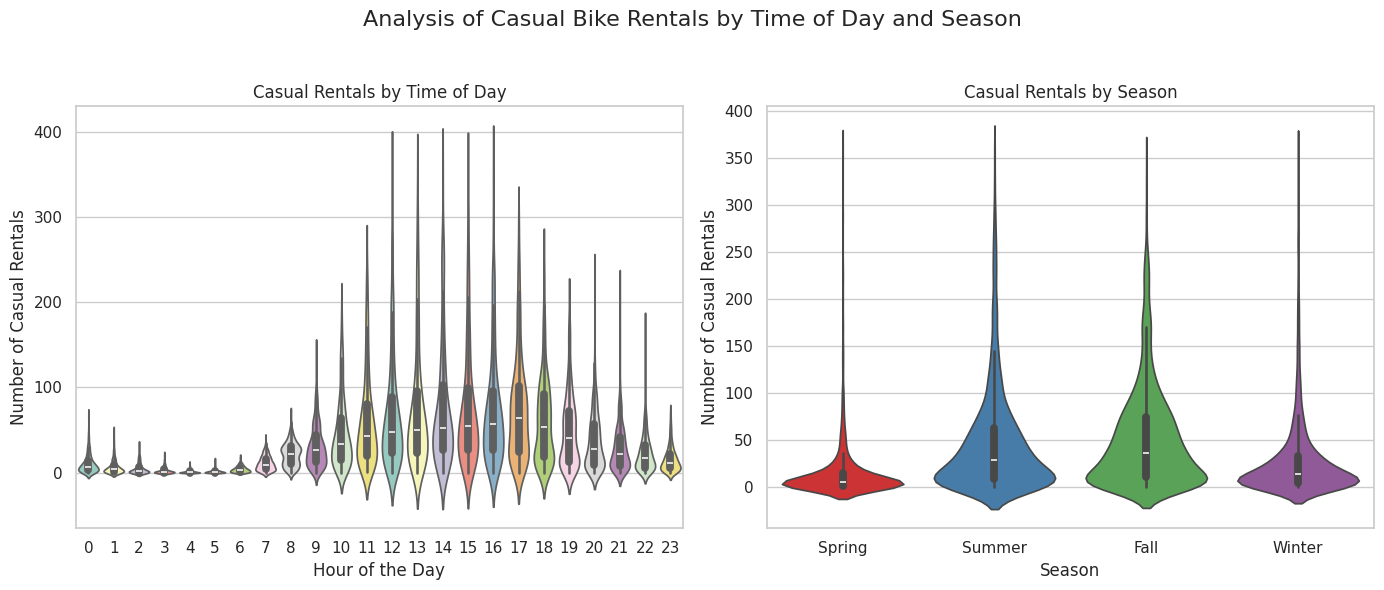

In [35]:
# Convert the 'datetime' column to datetime type to facilitate extraction of date parts
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract the hour component from the 'datetime' column to analyze rental patterns by time of day
df['hour'] = df['datetime'].dt.hour

# Setup the plot figure with dimensions 14x6 inches for clear visibility
plt.figure(figsize=(14, 6))

# Create a violin plot for casual rentals by hour of the day
# This subplot (1st of 2) compares the distribution of casual rentals at different hours
plt.subplot(1, 2, 1)
sns.violinplot(x=df['hour'], y=df['casual'], palette='Set3')
plt.title('Casual Rentals by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Casual Rentals')

# Create a violin plot for casual rentals by season
# This subplot (2nd of 2) examines how casual rentals vary with the seasons
plt.subplot(1, 2, 2)
sns.violinplot(x=df['season'], y=df['casual'], palette='Set1')
plt.title('Casual Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Number of Casual Rentals')

# Add a super title to the figure to provide an overall context for the plots
plt.suptitle('Analysis of Casual Bike Rentals by Time of Day and Season', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plot
plt.show()


#### **Insights on Analysis of Casual Bike Rentals by Time of Day and Season**

###### **Time of Day Variability:**  
- **Morning and Evening Peaks**: Casual rentals exhibit **significant peaks** around **typical commuting hours**, notably around **8 AM and 5 PM to 6 PM**. This suggests that **casual bike usage aligns with typical work commute times**.  
- **Midday Consistency**: There is also a **noticeable but less pronounced increase** around **midday**, indicating a **preference for leisure or errand activities during lunch hours**.  

###### **Seasonal Differences:**  
- **Summer Highs**: The **summer season** displays the **highest volume of casual rentals**, with a **wide distribution** indicating **high variability** in the number of rentals. This could be due to **favorable weather conditions encouraging more casual bike use**.  
- **Winter Lows**: **Winter shows the lowest activity** with **much fewer rentals**, likely due to **colder and possibly inclement weather deterring casual cyclists**.  

###### **Distribution Spread and Skewness:**  
- **Skew in Seasonal Data**: The **violin plots for seasons** show that **rental distributions in spring and summer** are **slightly right-skewed**, suggesting that there are **days with exceptionally high rental numbers** during these **warmer months**.  
- **Narrower Distribution in Winter**: **Winter has a much narrower distribution**, indicating **less variability in rental numbers**, possibly due to **consistently lower demand** caused by the **cold**.  

###### **Time of Day Distribution Width:**  
- **Wide Distribution in Evening**: The **evening hours** show **wider distributions** compared to **mornings**, suggesting **greater variability** in the number of rentals, which might be influenced by **leisure activities after work**.  
- **Sharper Peaks at Specific Hours**: The **sharp peaks at specific hours** like **8 AM and 5 PM** are indicative of **strong hourly patterns**, possibly linked to **commuting habits**.  

###### **Overall Rental Behavior:**  
- **General Preferential Times**: The **overall shape and spread** of the distributions across different hours suggest that **casual bike rentals are most popular during daylight and early evening hours**, tailing off **significantly late at night**.  
- **Seasonal Adaptation**: The **shape of the seasonal plots** shows how **casual rentals adapt to seasonal changes**, with **notable drops in colder months** and **spikes during warmer months**, reflecting the **adaptability of users to weather conditions**.  

These insights can be used by **bike rental services** to **tailor their offerings, marketing strategies, and operational planning** to **better align with user behavior patterns** observed at **different times of the day and during different seasons**.  

#### **4.1.6 What is the overall distribution of total bike rentals over time?**

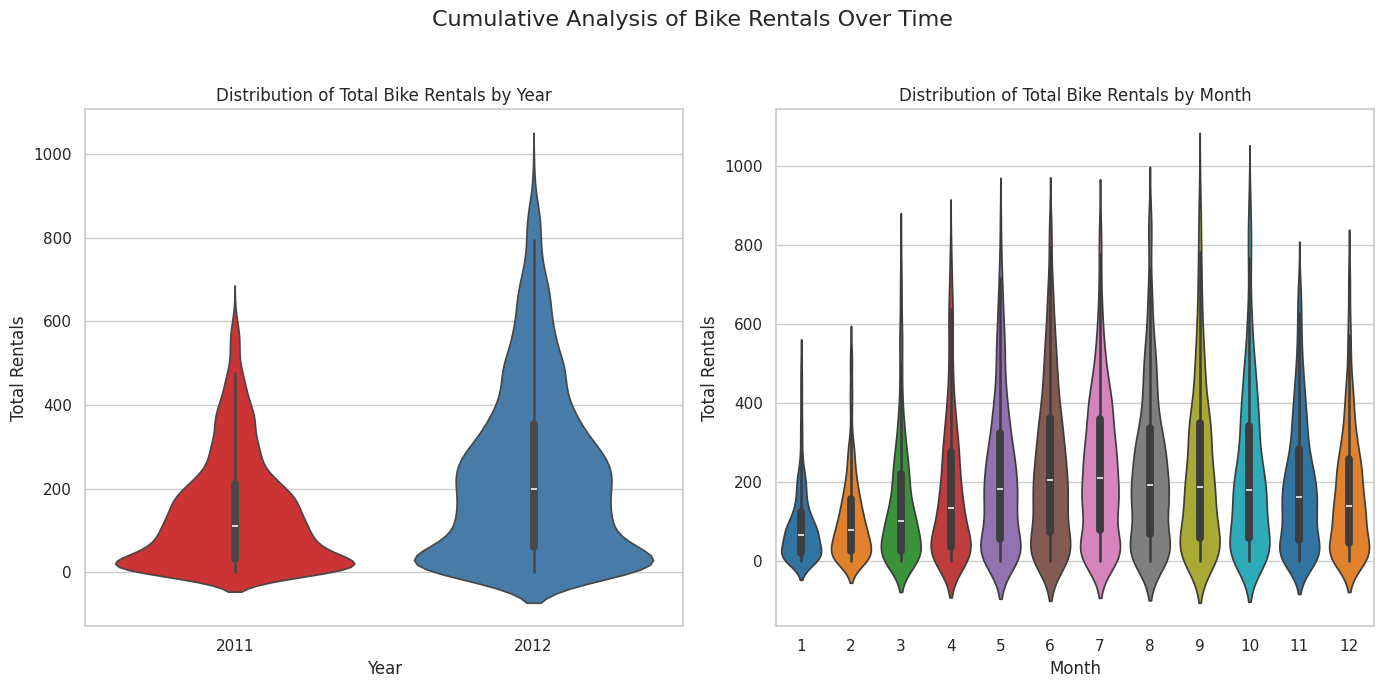

In [36]:
# Convert 'datetime' to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract 'year' from the 'datetime' column to analyze annual trends in bike rentals
df['year'] = df['datetime'].dt.year

# Extract 'month' from the 'datetime' column to analyze monthly trends in bike rentals
df['month'] = df['datetime'].dt.month

# Create a 'month_year' column for granular analysis of monthly data across different years
df['month_year'] = df['datetime'].dt.to_period('M')

# Set up the plot with a specified size to ensure adequate space for both subplots
plt.figure(figsize=(14, 7))

# Create the first subplot: a violin plot grouped by year
plt.subplot(1, 2, 1)
# Use seaborn's violin plot to display the distribution of total rentals per year
sns.violinplot(x='year', y='total_rentals', data=df, palette='Set1')
plt.title('Distribution of Total Bike Rentals by Year')  # Title for the first subplot
plt.xlabel('Year')  # Label for the x-axis
plt.ylabel('Total Rentals')  # Label for the y-axis

# Create the second subplot: a violin plot grouped by month across all years
plt.subplot(1, 2, 2)
# Use seaborn's violin plot to display the distribution of total rentals per month
sns.violinplot(x='month', y='total_rentals', data=df, palette='tab10')
plt.title('Distribution of Total Bike Rentals by Month')  # Title for the second subplot
plt.xlabel('Month')  # Label for the x-axis
plt.ylabel('Total Rentals')  # Label for the y-axis

# Add a super title for the entire figure to provide an overarching context
plt.suptitle('Cumulative Analysis of Bike Rentals Over Time', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plot
plt.show()

#### **Insights on Cumulative Analysis of Bike Rentals Over Time**  

###### **Yearly Distribution:**  
- **Variability**: The distribution of total rentals in **2011** shows a **sharper peak** compared to **2012**, indicating **more uniform rental numbers** throughout **2011**.  
- **Growth in Volume**: **2012** displays a **broader distribution** with a **higher peak**, suggesting an **increase in both the average number of rentals** and **variability in daily rental volumes**.  

###### **Monthly Distribution:**  
- **Seasonal Patterns**: The **width and height** of the violin plots **vary by month**, reflecting the **seasonal influence** on bike rentals. **Warmer months** like **June, July, and August** show **higher peaks** and **broader distributions**, indicating **higher rental activity**.  
- **Low Activity Months**: **Colder months** like **January and December** have **lower and narrower distributions**, highlighting **reduced bike rental activity** during **colder weather**.  

###### **Data Spread and Density:**  
- **Density Indication**: The **thickness** of each violin plot indicates the **density of data points** at different rental counts, with **thicker sections** showing **more common rental values**.  
- **Spread and Extremes**: **Wider parts of violins** in months like **May through September** suggest a **wider range of daily rentals**, from **very low to very high**, indicating **variable daily demand**.  

###### **Comparison Between Years:**  
- **Year Over Year Changes**: Comparing **2011 to 2012**, there is a **noticeable shift** in the **height and spread** of the distributions, implying an **overall increase in both the central tendency and variability of rental numbers**.  
- **Stability vs. Growth**: **2011** shows a **more stable rental pattern**, while **2012** indicates **growth** and possibly the **introduction of more bikes** or **expansion of service areas**.  

###### **Insight into Operational Planning:**  
- **Resource Allocation**: The visualization can help in **planning resource allocation**, such as the **number of bikes needed across different months** or **adjustments in marketing strategies** to **boost winter rentals**.  
- **Strategic Decisions**: Understanding which months have the **highest variability** can aid in **strategic decisions** related to **pricing, promotions, and service maintenance schedules**.  

These insights can help **bike rental companies** or **city planners** to **better understand the dynamics of bike rentals** over **different times of the year**, aiding in **more informed decision-making and strategic planning**.  

#### **4.2 Bivariate Analysis**

#### **4.2.1 Which season experiences the highest number of bike rentals?**

  Weather Condition  Total Rentals  Percentage
1            Spring         312498        15.0
2            Summer         588282        28.2
3              Fall         640662        30.7
4            Winter         544034        26.1


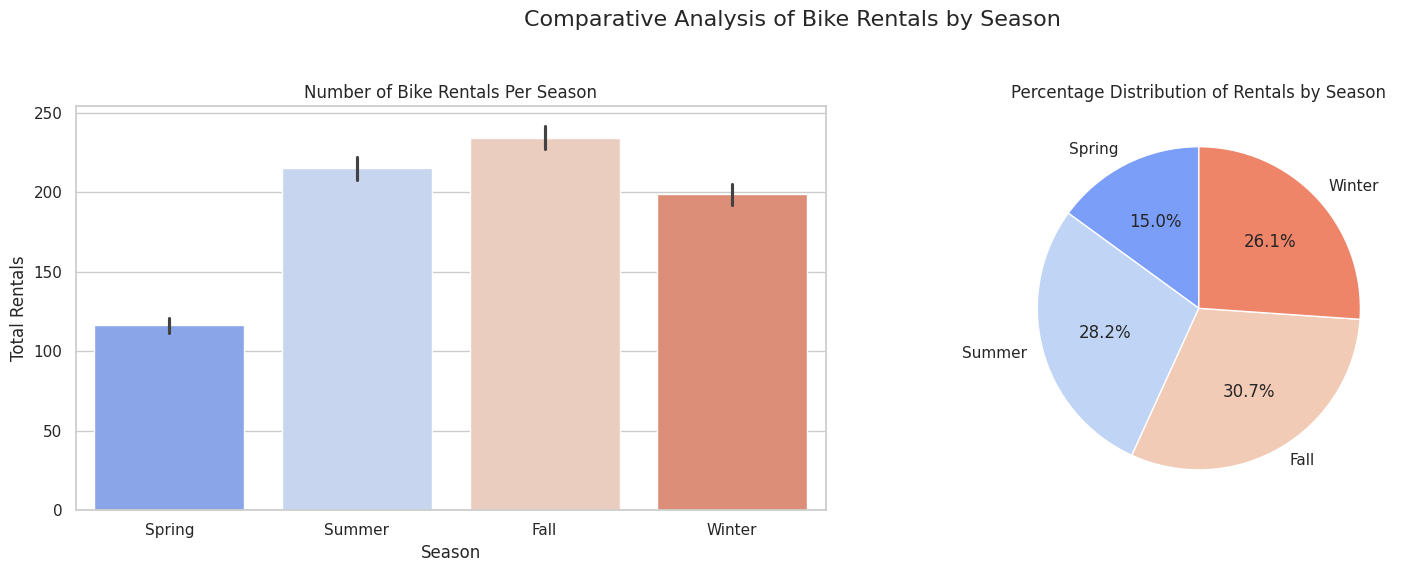

In [37]:
# Calculate totals for pie chart
season_totals = df.groupby('season')['total_rentals'].sum()

# Calculate percentages
total_rentals_sum = season_totals.sum()
weather_percentages = (season_totals / total_rentals_sum) * 100

# Round the percentages
weather_percentages = weather_percentages.round(1)

# Create a new DataFrame to store totals and percentages
summary_df = pd.DataFrame({
    'Weather Condition': season_totals.index,
    'Total Rentals': season_totals.values,
    'Percentage': weather_percentages.values
}, index=range(1, len(season_totals) + 1))

# Print the new DataFrame
print(summary_df)

# Set up the figure and subplots
plt.figure(figsize=(16, 6))

# Bar plot on the left
plt.subplot(1, 2, 1)
sns.barplot(x='season', y='total_rentals', data=df, palette='coolwarm')
plt.title('Number of Bike Rentals Per Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals')

# Pie chart on the right
plt.subplot(1, 2, 2)
plt.pie(season_totals, labels=season_totals.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("coolwarm", len(season_totals)))
plt.title('Percentage Distribution of Rentals by Season')

# Add a super title to the figure for overall context
plt.suptitle('Comparative Analysis of Bike Rentals by Season', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the complete figure with both plots
plt.show()

#### **Insights on Comparative Analysis of Bike Rentals by Season**  

###### **Fall Leads in Rentals:**  
- **Volume**: Fall shows the **highest total** in the bar plot, indicating it is the **peak season** for bike rentals.  
- **Percentage**: The pie chart reinforces this with **Fall accounting for 30.7%** of annual rentals, the **largest share** among the seasons.  

###### **Winter's Surprising Share:**  
- **Competitive Numbers**: Despite **typically colder weather**, **Winter closely follows Fall**, suggesting **robust rental activity**, which might be driven by **holiday tourism** or **mild winter climates**.  
- **Significant Percentage**: **Winter accounts for 26.1%** of the rentals, highlighting its **importance to the overall rental business**.  

###### **Summer and Spring:**  
- **High Expectations**: **Summer**, usually expected to **lead in such activities**, is **closely competitive**, showing **significant activity** but still **less than Fall**.  
- **Relatively Lower Share**: Surprisingly, **Spring has the lowest share**, at **15%**, which might indicate **less favorable weather** or **competing outdoor activities** drawing away potential bike renters.  

###### **Implications for Business Strategy:**  
- **Marketing Focus**: The data suggests that **marketing and promotional efforts** could be **beneficially increased** in **Fall and Winter** to **maximize the rental potential** noted during these seasons.  
- **Resource Allocation**: Ensuring **adequate bike availability and maintenance** during these **peak periods** could help **capitalize on the high demand**.  

###### **Operational Adjustments:**  
- **Extended Services**: Offering **guided tours** or **special rental packages** during **Fall and Winter** could further **enhance revenue**.  
- **Customer Engagement**: Engaging customers through **seasonal offers** or **loyalty programs** during **Spring and Summer** might help **elevate these seasons' rental numbers** closer to **Fall and Winter levels**.  

These insights suggest a **strategic approach** to managing bike rentals across **different seasons**, focusing on **maximizing the observed potential** during **Fall and Winter** while **boosting Spring and Summer** through **targeted initiatives**.  

#### **4.2.2 How do the cumulative frequencies of registered and casual rentals compare over several years?**

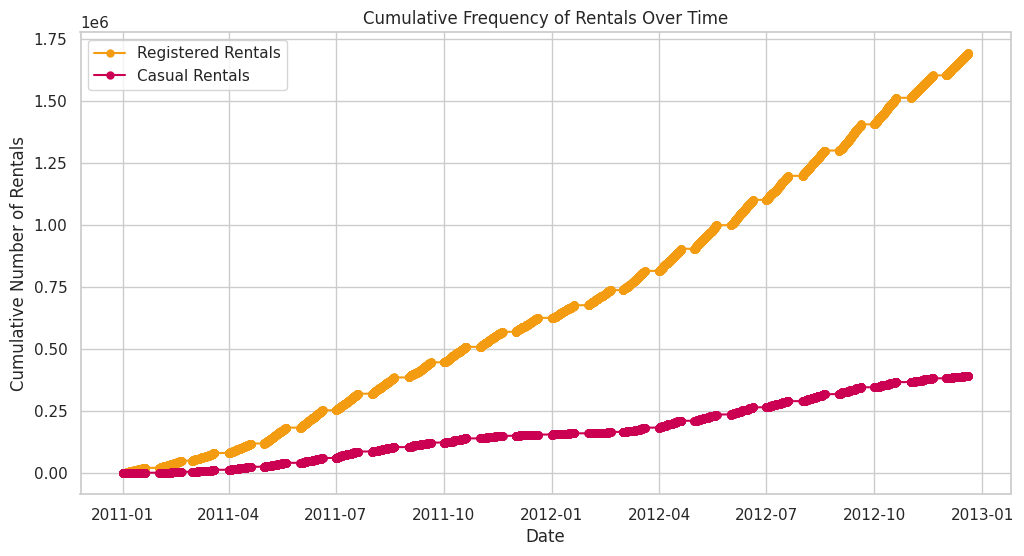

In [38]:
# Convert 'datetime' to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Sorting data by datetime to ensure the cumulative sum is correct
df = df.sort_values('datetime')

# Calculate cumulative sums
df['cumulative_registered'] = df['registered'].cumsum()
df['cumulative_casual'] = df['casual'].cumsum()

# Set up the plots
plt.figure(figsize=(12, 6))

# Plotting the cumulative frequency for registered rentals with points
plt.plot(df['datetime'], df['cumulative_registered'], label='Registered Rentals', color='#f39c12', marker='o', linestyle='-', markersize=5)

# Plotting the cumulative frequency for casual rentals with points
plt.plot(df['datetime'], df['cumulative_casual'], label='Casual Rentals', color='#cc0052', marker='o', linestyle='-', markersize=5)

# Adding plot titles and labels
plt.title('Cumulative Frequency of Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Number of Rentals')

# Adding a legend to differentiate between registered and casual rentals
plt.legend()

# Show the plot
plt.show()

#### **Insights on Cumulative Frequency of Rentals Over Time**  

###### **Steeper Slope for Registered Rentals:**  
- **Faster Accumulation**: The slope of the curve for **registered rentals** is **steeper** compared to casual rentals, indicating a **faster rate of accumulation**.  
- **Consistent Growth**: This trend suggests that **registered users** consistently use rental services **more frequently** than casual users, potentially due to **membership benefits** or **daily commuting habits**.  

###### **Gradual Increase in Casual Rentals:**  
- **Slower Growth**: **Casual rentals** show a **steadier and more gradual growth pattern**, which may reflect **sporadic use typical of non-regular customers**.  
- **Less Steep Curve**: The **less steep curve** for **casual rentals** implies that these users are **less likely to rent bikes** as frequently or regularly as **registered users**.  

###### **Seasonal Patterns:**  
- **Potential Seasonal Impact**: While not explicitly shown with seasonal markers, the **periodic fluctuations in the slope intensity** could suggest **seasonal variations** affecting rental frequencies.  
- **Influence of Weather and Tourism**: **Warmer months** likely boost **casual rental frequencies** due to **better weather and tourism**, a pattern **less pronounced** but still relevant for **registered users**.  

###### **Absolute Values and Scale:**  
- **Higher Total Volume for Registered**: The **higher cumulative total** for **registered rentals** by the end of the graph period underscores the **stronger reliance on bike rentals** among registered users.  
- **Significant Difference in Usage**: The **significant gap** between the **two curves** throughout the plot highlights the **difference in usage intensity** between user types.  

###### **Data Consistency and Reporting:**  
- **Smooth Data Collection**: The **smoothness of both curves** suggests **consistent data collection** and **reporting practices** over the analyzed period.  
- **Reliable User Engagement**: The **lack of any sharp dips or irregularities** in the curves indicates **stable user engagement** with the bike rental system over time.  

These insights highlight **key behavioral patterns** between **registered and casual bike rental users**, offering **valuable information** for **targeted marketing, resource allocation, and strategic planning** to **enhance service offerings** based on **user type preferences** and **usage trends**.  

#### **4.3.3 How does bike rental volume on holidays compare to non-holidays?**

  Weather Condition  Total Rentals  Percentage
1       Non-Holiday        2027668       97.23
2           Holiday          57808        2.77


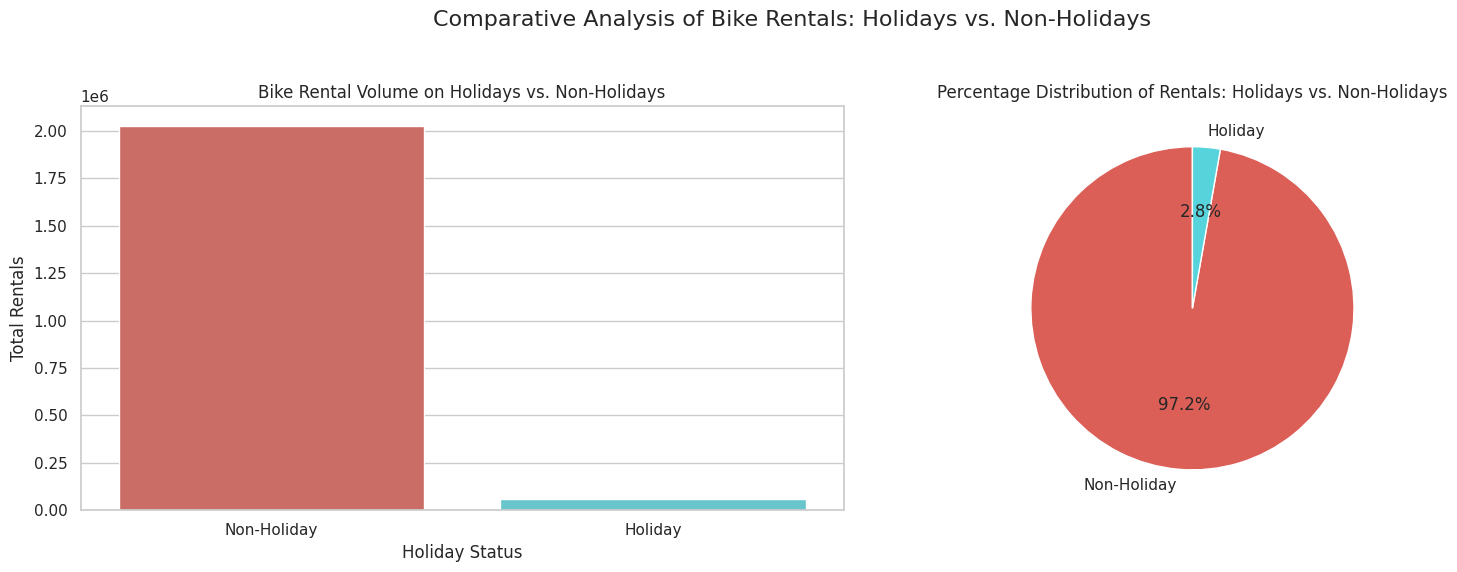

In [39]:
# Calculate totals for pie chart
holiday_totals = df.groupby('holiday')['total_rentals'].sum()

# Calculate percentages
total_rentals_sum = holiday_totals.sum()
weather_percentages = (holiday_totals / total_rentals_sum) * 100

# Round the percentages
weather_percentages = weather_percentages.round(2)

# Create a new DataFrame to store totals and percentages
summary_df = pd.DataFrame({
    'Weather Condition': holiday_totals.index,
    'Total Rentals': holiday_totals.values,
    'Percentage': weather_percentages.values
}, index=range(1, len(holiday_totals) + 1))

# Print the new DataFrame
print(summary_df)

# Set up the figure and subplots
plt.figure(figsize=(16, 6))

# Bar plot on the left for holiday comparison
plt.subplot(1, 2, 1)
sns.barplot(x=holiday_totals.index, y=holiday_totals.values, palette='hls')
plt.title('Bike Rental Volume on Holidays vs. Non-Holidays')
plt.xlabel('Holiday Status')
plt.ylabel('Total Rentals')

# Pie chart on the right for holiday comparison
plt.subplot(1, 2, 2)
plt.pie(holiday_totals, labels=holiday_totals.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("hls", len(holiday_totals)))
plt.title('Percentage Distribution of Rentals: Holidays vs. Non-Holidays')

# Add a super title to the figure for overall context
plt.suptitle('Comparative Analysis of Bike Rentals: Holidays vs. Non-Holidays', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the complete figure with both plots
plt.show()

#### **Insights on Comparative Analysis of Bike Rentals: Holidays vs. Non-Holidays**  

###### **Dominance of Non-Holiday Rentals:**  
- **Volume**: **Non-holidays overwhelmingly dominate** bike rentals, as shown by the **bar plot**, where the **total rentals during non-holidays significantly exceed those on holidays**.  
- **Contextual Importance**: This suggests that **everyday routines** or **regular commuter use** likely drive the **bulk of bike rentals**.  

###### **Small Percentage on Holidays:**  
- **Proportional Representation**: The **pie chart reveals** that only **2.8% of total rentals occur on holidays**, which is a **small fraction** compared to **97.2% on non-holidays**.  
- **Strategic Insight**: This **low percentage** points to **possible underutilization during holidays**, which could be an **opportunity for targeted promotions** or **special holiday packages**.  

###### **Visualization Impact:**  
- **Bar Plot Clarity**: The **bar plot effectively conveys absolute numbers**, which visually illustrates the **stark contrast** between holiday and non-holiday rentals.  
- **Pie Chart Impact**: The **pie chart complements this by showing the disproportionate distribution**, which might prompt a **reevaluation of business strategies for holiday periods**.  

###### **Operational Implications:**  
- **Resource Allocation**: Given the **high volume of rentals on non-holidays**, resources such as **maintenance and customer service** should be **optimized for these days**.  
- **Holiday Potential**: Exploring **why rentals are low on holidays**—whether due to **operational hours, lesser promotions, or public perception**—could help in **tapping into this untapped potential**.  

###### **Marketing and Promotions:**  
- **Non-Holiday Focus**: **Current strategies seem effective during regular days**, but reviewing **customer engagement and satisfaction** could enhance **loyalty** and **increase usage rates**.  
- **Holiday Strategies**: Developing **special holiday incentives**, such as **discounts, events, or themed rides**, could **encourage more rentals** on these days, **balancing the usage throughout the year**.  

These insights should guide further **detailed analysis and strategic planning** to **boost holiday rentals** and **optimize operations during high-demand periods**.  

#### **4.2.4 Are there more bike rentals on working days compared to non-working days?**

  Weather Condition  Total Rentals  Percentage
1       Non-Working         654872        31.4
2           Working        1430604        68.6


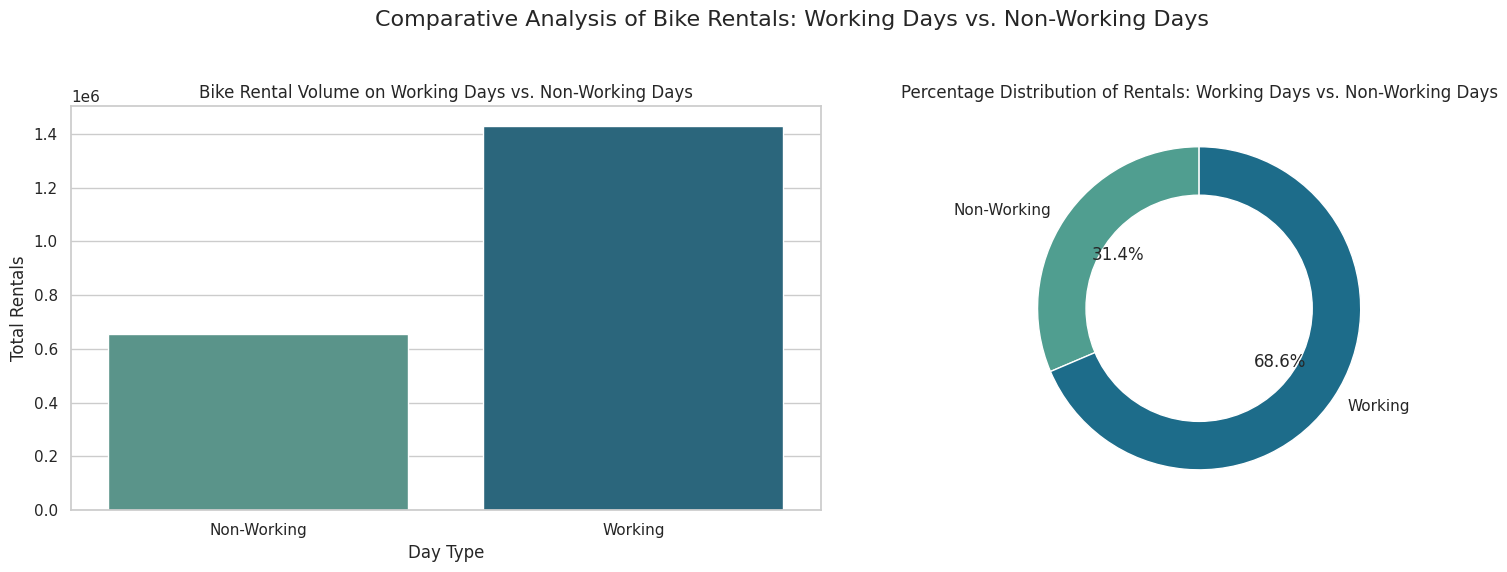

In [40]:
# Calculate totals for the donut chart
workingday_totals = df.groupby('workingday')['total_rentals'].sum()

# Calculate percentages
total_rentals_sum = workingday_totals.sum()
weather_percentages = (workingday_totals / total_rentals_sum) * 100

# Round the percentages
weather_percentages = weather_percentages.round(2)

# Create a new DataFrame to store totals and percentages
summary_df = pd.DataFrame({
    'Weather Condition': workingday_totals.index,
    'Total Rentals': workingday_totals.values,
    'Percentage': weather_percentages.values
}, index=range(1, len(workingday_totals) + 1))

# Print the new DataFrame
print(summary_df)

# Set up the figure and subplots
plt.figure(figsize=(16, 6))

# Bar plot on the left for working day comparison
plt.subplot(1, 2, 1)
sns.barplot(x=workingday_totals.index, y=workingday_totals.values, palette='crest')
plt.title('Bike Rental Volume on Working Days vs. Non-Working Days')
plt.xlabel('Day Type')
plt.ylabel('Total Rentals')

# Donut chart on the right for working day comparison
plt.subplot(1, 2, 2)
plt.pie(workingday_totals, labels=workingday_totals.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("crest", len(workingday_totals)))
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))
plt.title('Percentage Distribution of Rentals: Working Days vs. Non-Working Days')

# Add a super title to the figure for overall context
plt.suptitle('Comparative Analysis of Bike Rentals: Working Days vs. Non-Working Days', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the complete figure with both plots
plt.show()

#### **Insights on Comparative Analysis of Bike Rentals: Working Days vs. Non-Working Days**  

###### **Higher Rentals on Working Days:**  
- **Volume**: The **bar plot clearly shows** that **bike rentals on working days significantly surpass those on non-working days**.  
- **Implication**: This suggests that bikes are possibly used for **commuting to work or school**, indicating a **utilitarian use rather than purely recreational**.  

###### **Proportional Dominance:**  
- **Percentage**: The **donut chart illustrates** that a **vast majority (68.6%) of bike rentals occur on working days**.  
- **Strategy**: **Promotions or incentives** might be **targeted on non-working days** to **balance the usage** and **increase rentals during these periods**.  

###### **Visual Impact:**  
- **Aesthetic Choice**: The use of the **'crest' palette** in both plots provides a **cohesive visual experience**, making the **data presentation visually appealing**.  
- **Data Presentation**: The **clarity and simplicity** of the **donut chart** help in **instantly conveying the disproportionate distribution** between working and non-working days.  

###### **Operational Insights:**  
- **Resource Allocation**: Given the **higher demand on working days**, **more resources might be needed** for **fleet maintenance and customer service** during these days.  
- **Marketing Opportunities**: There might be an **opportunity to increase rentals on non-working days** through **targeted marketing campaigns or weekend specials**.  

###### **Long-Term Planning:**  
- **Infrastructure Development**: Understanding **peak rental times** can help in **planning for better bike lane infrastructure or parking spaces**, particularly in **areas with high commuter traffic**.  
- **Partnership Opportunities**: **Partnering with local businesses and workplaces** could drive **higher rental rates**, offering **promotions** or **integrated services** like **bike-sharing programs**.  

These insights can guide **strategic decisions** to **optimize operations, improve service offerings,** and **potentially expand the market reach** of the **bike rental service** to ensure it meets the **needs of both daily commuters and casual riders**.  

#### **4.2.5 Which weather conditions see the highest and lowest bike rentals?**

     Weather Condition  Total Rentals  Percentage
1  Clear/Partly Cloudy        1476063       70.78
2          Mist/Cloudy         507160       24.32
3      Light Snow/Rain         102089        4.90
4  Heavy Rain/Snow/Fog            164        0.01


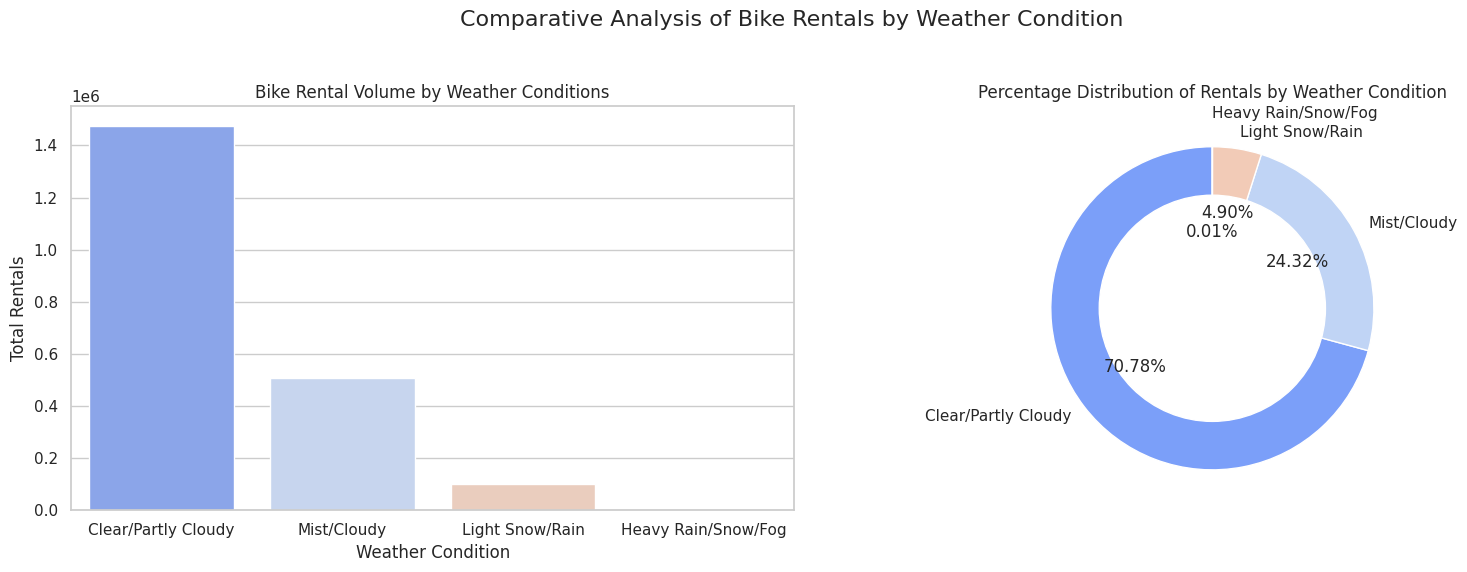

In [41]:
# Calculate totals for the donut chart
weather_totals = df.groupby('weather')['total_rentals'].sum()

# Calculate percentages
total_rentals_sum = weather_totals.sum()
weather_percentages = (weather_totals / total_rentals_sum) * 100

# Round the percentages
weather_percentages = weather_percentages.round(2)

# Create a new DataFrame to store totals and percentages
summary_df = pd.DataFrame({
    'Weather Condition': weather_totals.index,
    'Total Rentals': weather_totals.values,
    'Percentage': weather_percentages.values
}, index=range(1, len(weather_totals) + 1))

# Print the new DataFrame
print(summary_df)

# Function to format autopct values with line breaks
def format_autopct(pct):
    total = sum(weather_totals)
    val = int(round(pct*total/100.0))
    return '{:.2f}%'.format(pct) if pct >= 1.0 else '\n\n{:.2f}%'.format(pct)

# Function to modify labels with conditional line breaks
def modify_labels(labels):
    modified_labels = []
    for index, label in enumerate(labels):
        if index > 2:
            modified_labels.append(label + '\n\n')
        else:
            modified_labels.append(label)
    return modified_labels

# Set up the figure and subplots
plt.figure(figsize=(16, 6))

# Bar plot on the left for weather condition comparison
plt.subplot(1, 2, 1)
sns.barplot(x=weather_totals.index, y=weather_totals.values, palette='coolwarm')
plt.title('Bike Rental Volume by Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Total Rentals')

# Donut chart on the right for weather condition comparison
plt.subplot(1, 2, 2)
plt.pie(weather_totals, labels=modify_labels(weather_totals.index), autopct=lambda pct: format_autopct(pct), startangle=90, colors=sns.color_palette("coolwarm", len(weather_totals)))
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))
plt.title('Percentage Distribution of Rentals by Weather Condition')

# Add a super title to the figure for overall context
plt.suptitle('Comparative Analysis of Bike Rentals by Weather Condition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the complete figure with both plots
plt.show()

#### **Insights on Comparative Analysis of Bike Rentals by Weather Condition**  

###### **Dominance of Favorable Weather:**  
- **High Rentals**: The highest bike rentals are likely seen in **more favorable weather conditions** such as **'Clear/Partly Cloudy'**, which generally **encourages outdoor activities**.  
- **User Preference**: This preference indicates that **users are more inclined to rent bikes** when the **weather is perceived as safe and pleasant**.  

###### **Impact of Adverse Weather:**  
- **Low Rentals**: **Adverse weather conditions** such as **'Heavy Rain/Snow/Fog'** see the **lowest rentals**, reflecting **user aversion to biking under harsh conditions**.  
- **Safety and Comfort**: These conditions likely **deter rentals** due to **safety concerns** and the **discomfort of biking in poor weather**.  

###### **Proportional Representation:**  
- **Visualization**: The **donut chart** provides a **clear visual representation** of how **different weather conditions** share the **total bike rentals**, emphasizing the **impact of weather on rental decisions**.  
- **Strategic Insights**: Knowing which **conditions lead to fewer rentals** can help **businesses plan better** for **weather-related downturns**.  

###### **Data-Driven Decisions:**  
- **Resource Allocation**: Insights from the data can guide **resource allocation**, such as the **placement of bike stations** and **maintenance scheduling** according to **weather trends**.  
- **Marketing Strategies**: **Promotions** could be **timed** or **designed** to **counteract the lower rental periods** identified in **adverse weather conditions**.  

###### **Enhancing User Experience:**  
- **Weather Preparedness**: **Providing weather gear** or **options for rainy and snowy days** might help **mitigate the drop in rentals**.  
- **Feedback Incorporation**: **Collecting user feedback** during **different weather conditions** could provide **additional insights** into **necessary improvements** or **desired services**.  

These insights will be **instrumental in refining operational strategies, marketing approaches, and overall service offerings** to **maximize bike rental usage** throughout **various weather conditions**. The **visual representation** using **both bar and donut charts** not only **highlights these trends** but also serves as a **tool for communicating these findings clearly to stakeholders**.  

---

### **5. Correlation Analysis**

#### **5.1 What is the correlation between the continuous variables temp, atemp, humidity, windspeed, casual, registered, and total_rentals, and how do they influence each other?**

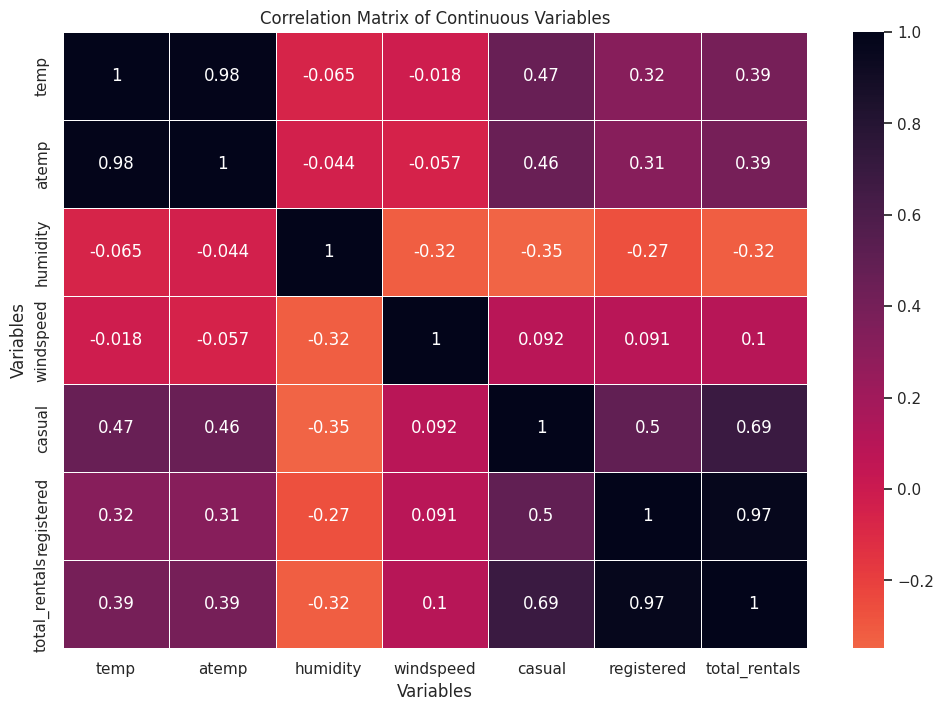

In [42]:
# Continuous numerical variables for correlation analysis
continuous_variables = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'total_rentals']

# Compute the correlation matrix for the selected continuous variables
correlation_matrix = df[continuous_variables].corr()

# Set figure size for better visualization
plt.figure(figsize=(12, 8))

# Generate a heatmap to display the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='rocket_r', center=0, linewidths=0.5)

# Add title and axis labels
plt.title('Correlation Matrix of Continuous Variables')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Display the heatmap
plt.show()

#### **Insights on Correlation Matrix of Continuous Variables**

###### **Temperature Correlations:**
- **Strong Positive Correlation**: There's a near-perfect positive correlation (0.98) between **temp** and **atemp**, indicating that both variables essentially provide the same information.
- **Influence on Rentals**: Both **temp** and **atemp** show a **moderate positive correlation** with **casual, registered, and total_rentals** (around **0.31 to 0.47**), suggesting that **higher temperatures boost rental activity**.

###### **Humidity's Impact:**
- **Negative Influence**: Humidity negatively correlates with both **casual (-0.35)** and **total_rentals (-0.32)**, hinting that **increased humidity could deter rental activities**.
- **Less Impact on Registered Users**: The correlation between **humidity and registered rentals** is slightly **less negative (-0.27)**, possibly indicating that **regular users are less deterred by uncomfortable weather conditions**.

###### **Windspeed and Rentals:**
- **Limited Impact**: Windspeed shows a **very low correlation** with rental numbers (**0.09 with casual and 0.10 with total_rentals**), implying it has **little effect on rental decisions**.
- **Slight Negative Correlation with Humidity**: A **slight negative correlation** with humidity (**-0.32**) suggests that **less humid days might experience slightly higher wind speeds**.

###### **Casual vs. Registered Users:**
- **Different Sensitivities**: Casual rentals show a **higher correlation** with **temperature variables** compared to registered rentals, indicating that **casual users are more likely to rent based on pleasant weather**.
- **Strong Link with Total Rentals**: Both **casual and registered users** have **high correlations** with **total_rentals (0.69 and 0.97 respectively)**, underscoring that **both user types significantly contribute to total rental volumes**, with **registered users being a more consistent contributor**.

###### **Overall Rental Trends:**
- **Temperature Drives Rentals**: The **positive correlations** between **temperature measures (temp, atemp) and rentals** underscore that **warmer weather conditions increase bike rental activities**.
- **Weather Sensitivity**: The data suggests that **rental activities are sensitive to weather conditions**, with **more favorable conditions leading to higher rental numbers**.

These insights provide a foundational understanding of how **environmental conditions and user types influence bike rental patterns**. This knowledge can be **pivotal for businesses and urban planners** in making **informed decisions** regarding **bike-sharing services, infrastructure, and seasonal demand forecasting**.


#### **5.2 How do temperature (temp), apparent temperature (atemp), humidity, and wind speed interact across different seasons, and what patterns or trends can be observed from their distributions and relationships in the dataset as visualized in the pairplot?**

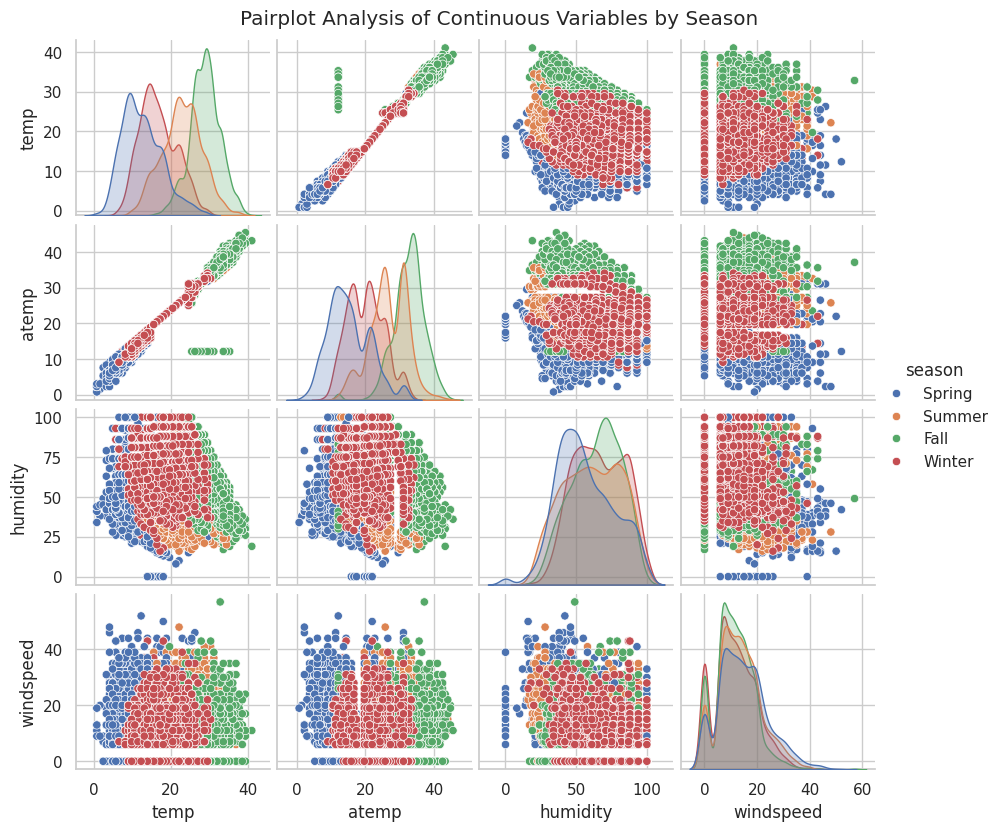

In [43]:
# Define the continuous numerical variables for pairplot analysis
continuous_variables_part1 = ['temp', 'atemp', 'humidity', 'windspeed']

# Create a pairplot for the first part of variables with hue based on 'season'
pairplot = sns.pairplot(df, vars=continuous_variables_part1, hue='season', diag_kind='kde')

# Add a title to the plot
pairplot.fig.suptitle('Pairplot Analysis of Continuous Variables by Season', y=1.02)

# Overall figure size
pairplot.fig.set_size_inches(10, 8)

# Display the plot
plt.show()

#### **Insights on Pairplot Analysis of Continuous Variables by Season**  

###### **Seasonal Temperature Variations:**  
- **Spring and Fall Similarities**: **Spring and Fall** show **overlapping distributions** in both **temperature and apparent temperature**, suggesting **similar thermal conditions**.  
- **Winter Distinctiveness**: **Winter** distinctly features **lower temperatures**, as indicated by **more compressed clusters at lower ends** of the temperature axes.  

###### **Apparent Temperature Alignment:**  
- **High Correlation**: There is a **strong linear relationship** between **actual temperature (temp) and apparent temperature (atemp)**, with **tight clustering along the line of equality** across all seasons.  
- **Seasonal Consistency**: This relationship **holds consistently across all seasons**, indicating that **perceived temperature closely mirrors actual temperature** irrespective of the season.  

###### **Humidity Distribution:**  
- **Variability Across Seasons**: **Humidity levels are broadly spread across all seasons**, but **Winter** tends to show **higher concentrations** of points at **higher humidity levels**.  
- **Less Seasonal Discrimination**: Compared to temperature, **humidity does not distinctly separate seasons**, indicating a **less direct impact** of seasons on humidity levels.  

###### **Wind Speed Patterns:**  
- **Lower Wind Speeds in Summer**: **Summer** tends to show **clusters of lower wind speeds** compared to other seasons, which might **contribute to higher perceived temperatures**.  
- **Broader Distribution in Winter**: **Winter** displays a **wider spread in wind speeds**, suggesting **more variable wind conditions** during **colder months**.  

###### **Inter-variable Relationships:**  
- **Temperature and Wind Speed**: There appears to be **no strong correlation** between **temperature and wind speed**, as points are **broadly distributed without a clear pattern**.  
- **Humidity and Temperature**: **Lower temperatures in Winter** correlate with **higher humidity**, noticeable from the **denser clustering of red points (Winter) at higher humidity levels**.  

These insights help in understanding **how different environmental variables interact** with each other across seasons and can inform **decisions related to weather-dependent planning and operations**.  

#### **5.3 What are the relationships and distribution patterns between casual users, registered users, and total bike rentals under varying weather conditions, as illustrated by the pairplot analysis?**

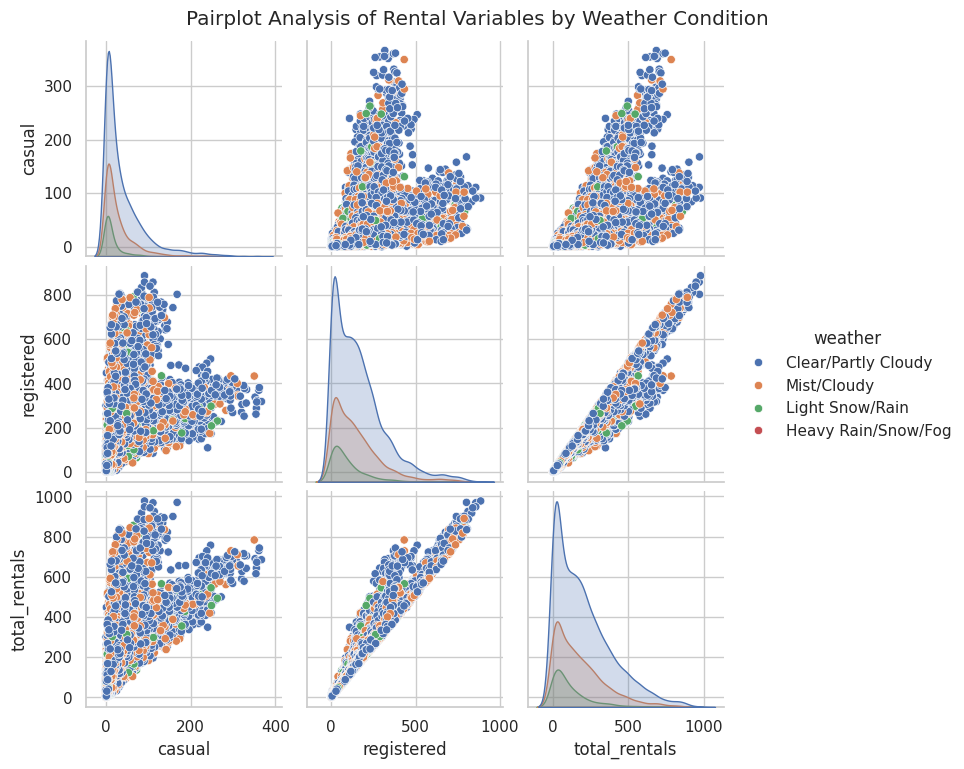

In [44]:
# Define the continuous numerical variables for pairplot analysis
continuous_variables_part2 = ['casual', 'registered', 'total_rentals']

# Create a pairplot for the second part of variables with hue based on 'weather'
pairplot = sns.pairplot(df, vars=continuous_variables_part2, hue='weather', diag_kind='kde')

# Add a title to the plot
plt.suptitle('Pairplot Analysis of Rental Variables by Weather Condition', y=1.02)

# Display the plot
plt.show()

#### **Insights on Pairplot Analysis of Rental Variables by Weather Condition**  

###### **Weather Impact on Casual and Registered Rentals:**  
- **Clear Weather Dominance**: The highest numbers of both **casual** and **registered** rentals occur under **clear/partly cloudy conditions**, indicating **preferred weather for biking**.  
- **Reduced Activity in Adverse Weather**: There is a **noticeable drop** in both **casual and registered rentals** during **light snow/rain** and **almost no activity** under **heavy rain/snow/fog conditions**.  

###### **Casual vs. Registered User Behavior:**  
- **Casual Sensitivity to Weather**: **Casual rentals** show a **significant decrease** as weather conditions worsen, suggesting that **casual users are less likely to rent bikes in less ideal weather**.  
- **Registered Consistency**: **Registered users** demonstrate **more consistent rental patterns** across weather conditions, although there is still a **visible decrease** under **adverse weather**.  

###### **Distribution Patterns:**  
- **Skewed Distributions in Bad Weather**: **Rental counts** for both user types are **skewed towards lower numbers** in **poor weather conditions**, reinforcing the **impact of weather on biking habits**.  
- **Broad Spread in Clear Weather**: In **clear weather**, the **distribution of rentals spreads across a broader range**, indicating **varied usage intensity** that is **not as prominent in bad weather**.  

###### **Correlation Between Casual and Registered Users:**  
- **Positive Correlation**: There is a **positive correlation** between **casual and registered rentals**, showing that **trends affecting one group often similarly affect the other**, particularly **noticeable under favorable weather conditions**.  
- **Stronger Alignment Under Clear Skies**: This **alignment is most pronounced under clear weather**, suggesting **optimal conditions bring out similar behaviors in both groups**.  

###### **Total Rentals Insights:**  
- **Direct Relationship with User Types**: **Total rentals** show a **direct correlation** with both **casual** and **registered** user numbers, indicating that **overall rental volume is strongly dependent on both groups**.  
- **Weather's Role in Total Volume**: The **total rental count visibly increases** under **clear/partly cloudy conditions** and **decreases significantly** with worsening weather, highlighting **weather as a key determinant of overall rental activity**.  

These insights offer a **clear view of how weather conditions significantly influence bike rental patterns**, affecting **casual and registered users differently** and **impacting the total rental volume**.  

---

### **6. Outlier Detection**

#### Using df_raw for outlier detection

#### **6.1 Detecting Outliers**

In [45]:
# Function to count and return the number of outliers in each column of a DataFrame
def count_outliers(df, columns):
    outlier_counts = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = column_outliers.shape[0]

    return outlier_counts

# Columns to check for outliers
columns = df_raw.select_dtypes(include=['number']).columns

# Count outliers in specified columns
outlier_counts = count_outliers(df_raw, columns)

# Create a DataFrame to display the counts
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier Count'])
print("Number of outliers detected in each column:")
print(outlier_counts_df)

Number of outliers detected in each column:
       Column  Outlier Count
0        temp              0
1       atemp              0
2    humidity             22
3   windspeed            227
4      casual            749
5  registered            423
6       count            300


The **temp** and **atemp** columns have no detected **outliers**, indicating consistent and reliable data within these fields.

#### **6.2  Visualizing Outliers**

#### **Boxplot to Spot Outliers:**

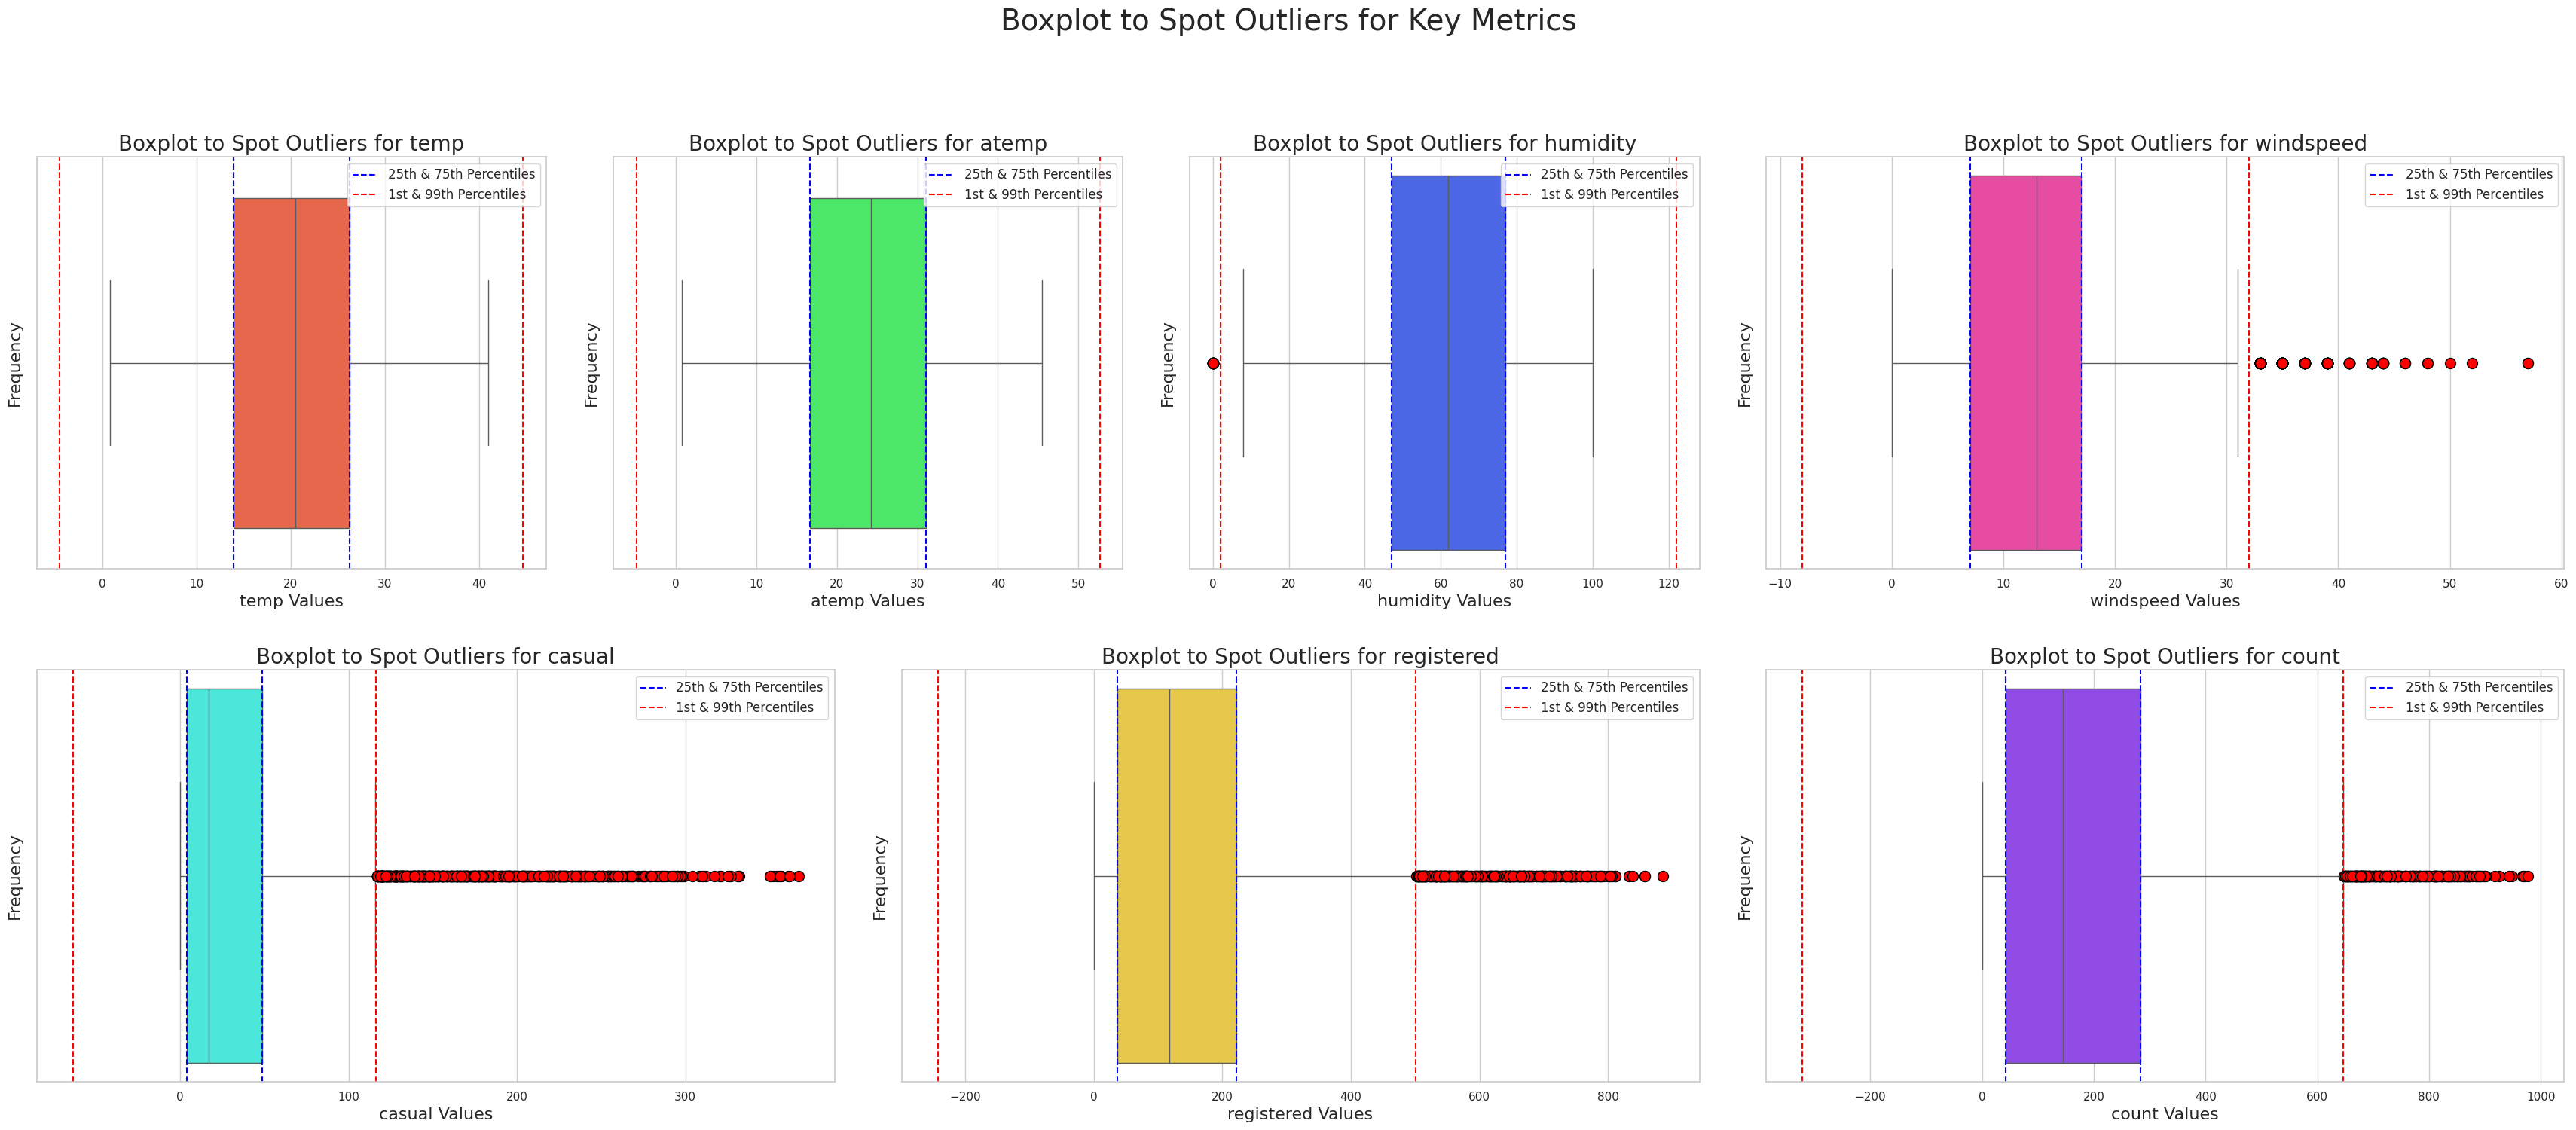

In [46]:
# Setup the figure and grid layout
sns.set(style="whitegrid")
fig = plt.figure(figsize=(35, 15))

gs = gridspec.GridSpec(2, 9)  # Define a grid with 2 rows and 9 columns

# Assign subplots to specific grid locations
ax1 = fig.add_subplot(gs[0, 0:2])  # First row, spans the first two of nine columns
ax2 = fig.add_subplot(gs[0, 2:4])  # First row, spans the next two of nine columns
ax3 = fig.add_subplot(gs[0, 4:6])  # First row, spans the next two of nine columns
ax4 = fig.add_subplot(gs[0, 6:9])  # First row, spans the last three of nine columns
ax5 = fig.add_subplot(gs[1, 0:3])  # Second row, spans the first three of nine columns
ax6 = fig.add_subplot(gs[1, 3:6])  # Second row, spans the next three of nine columns
ax7 = fig.add_subplot(gs[1, 6:9])  # Second row, spans the last three of nine columns

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

# Define a custom color palette
custom_palette = ["#FF5733", "#33FF57", "#3357FF", "#FF33A5", "#33FFF0", "#FFD733", "#8E33FF"]

# Loop through each column and plot on the designated axes
for i, col in enumerate(columns):
    if i < len(axes):  # Ensure the number of columns is within the range of defined axes
        sns.boxplot(x=df_raw[col], ax=axes[i], color=custom_palette[i], showfliers=False)
        Q1 = df_raw[col].quantile(0.25)
        Q3 = df_raw[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify and highlight outliers with red circles
        outliers = df_raw[col][(df_raw[col] < lower_bound) | (df_raw[col] > upper_bound)]
        for outlier in outliers:
            axes[i].scatter(outlier, 0, color='red', s=100, edgecolor='black', zorder=5)

        # Set titles and labels with increased font size
        axes[i].set_title(f'Boxplot to Spot Outliers for {col}', fontsize=20)
        axes[i].set_xlabel(f'{col} Values', fontsize=16)
        axes[i].set_ylabel('Frequency', fontsize=16)

        # Labeling percentiles
        axes[i].axvline(x=Q1, color='blue', linestyle='--', label='25th & 75th Percentiles')
        axes[i].axvline(x=Q3, color='blue', linestyle='--')
        axes[i].axvline(x=lower_bound, color='red', linestyle='--', label='1st & 99th Percentiles')
        axes[i].axvline(x=upper_bound, color='red', linestyle='--')

        axes[i].legend(loc='upper right', fontsize=12)

# Set a descriptive suptitle
plt.suptitle('Boxplot to Spot Outliers for Key Metrics', fontsize=28, y=1.02)
plt.tight_layout(pad=3.0)
plt.show()

#### **Insights of Boxplot to Spot Outliers for Key Metrics**

###### **Temperature (Temp):**  
- **Centralized Distribution**: The majority of temperature readings are within a **moderate range**, with **few outliers**, suggesting a **temperate climate**.  
- **Stability Across Seasons**: The **minimal outliers in temperature** indicate **stable weather conditions** across most of the year, suitable for **outdoor activities like biking**.  

###### **Apparent Temperature (Atemp):**  
- **Close Alignment with Temp**: The **apparent temperature closely follows** the **actual temperature**, with a **similar distribution**, emphasizing **consistent thermal perceptions**.  
- **Few Extreme Values**: **Both metrics** showing **few outliers** suggest that **extreme temperatures are rare**, enhancing **comfort for outdoor activities**.  

###### **Humidity:**  
- **Uniform Distribution**: Most of the data points for **humidity cluster within a central range**, indicating a **lack of extreme moisture conditions**.  
- **Minimal Outliers**: The **rare outliers in humidity** suggest occasional days that could be **very dry or extremely humid**, potentially **affecting comfort levels**.  

###### **Windspeed:**  
- **Noticeable Outliers**: There are **visible outliers** indicating days with **significantly higher winds**, which could **impact cycling conditions**.  
- **General Low Winds**: The bulk of the **windspeed measurements** are **low**, indicating **generally calm conditions ideal for biking**.  

###### **Casual Rentals:**  
- **High Variability**: **Outliers are prevalent** in casual rentals, reflecting **variability in usage** possibly influenced by **non-commuter behavior like tourism or leisure activities**.  
- **Peak Days Visible**: The **outliers on the upper end** could correspond to **exceptionally good weather days or special events** that attract **more casual users**.  

###### **Registered Rentals:**  
- **Consistent Usage**: **Fewer outliers** in **registered rentals** suggest a **consistent user base**, likely comprising **daily commuters or regular users**.  
- **Stability in Demand**: The **stability and fewer extremes** in **registered rentals** could aid in **reliable demand forecasting for operational planning**.  

###### **Total Rentals (Count):**  
- **Demand Peaks**: **Outliers in total rentals** reflect **peak demand days**, which could be **leveraged for promotional or resource allocation strategies**.  
- **Correlation with Events**: **Peaks in total rentals** may coincide with **public holidays, events, or exceptionally good weather**, suggesting **opportunities for targeted marketing**.  

###### **General Trends:**  
- **Predictability in Registered Rentals**: The **regular pattern** in **registered rentals** suggests **predictability**, useful for **managing inventory and staffing**.  
- **Casual Rentals' Sensitivity**: The **higher variability in casual rentals** highlights their **sensitivity to external factors** like **weather or local events**.  

###### **Weather Influence:**  
- **Impact on Casual Users**: The **relationship between weather conditions and rental patterns**, especially visible through **casual rental outliers**, underlines the **impact of weather on recreational biking**.  
- **Operational Adjustments**: Understanding **weather impact on rentals** can help **operators adjust provisions** like **maintenance and availability** in response to **weather forecasts**.  

###### **Seasonal and Weather Impacts:**  
- **Seasonal Variability**: **Outliers in temperature and humidity** may indicate **seasonal changes**, impacting **rental patterns differently across the year**.  
- **Preparedness for Extremes**: **Awareness of extreme weather outliers** can guide **preparations for atypical conditions**, ensuring **service continuity and safety**.  

These insights provide a **comprehensive view of how environmental factors and user types influence bike rental patterns**, assisting stakeholders in **making informed operational and strategic decisions**.  

#### **Distribution Plot to Confirm Outliers:**

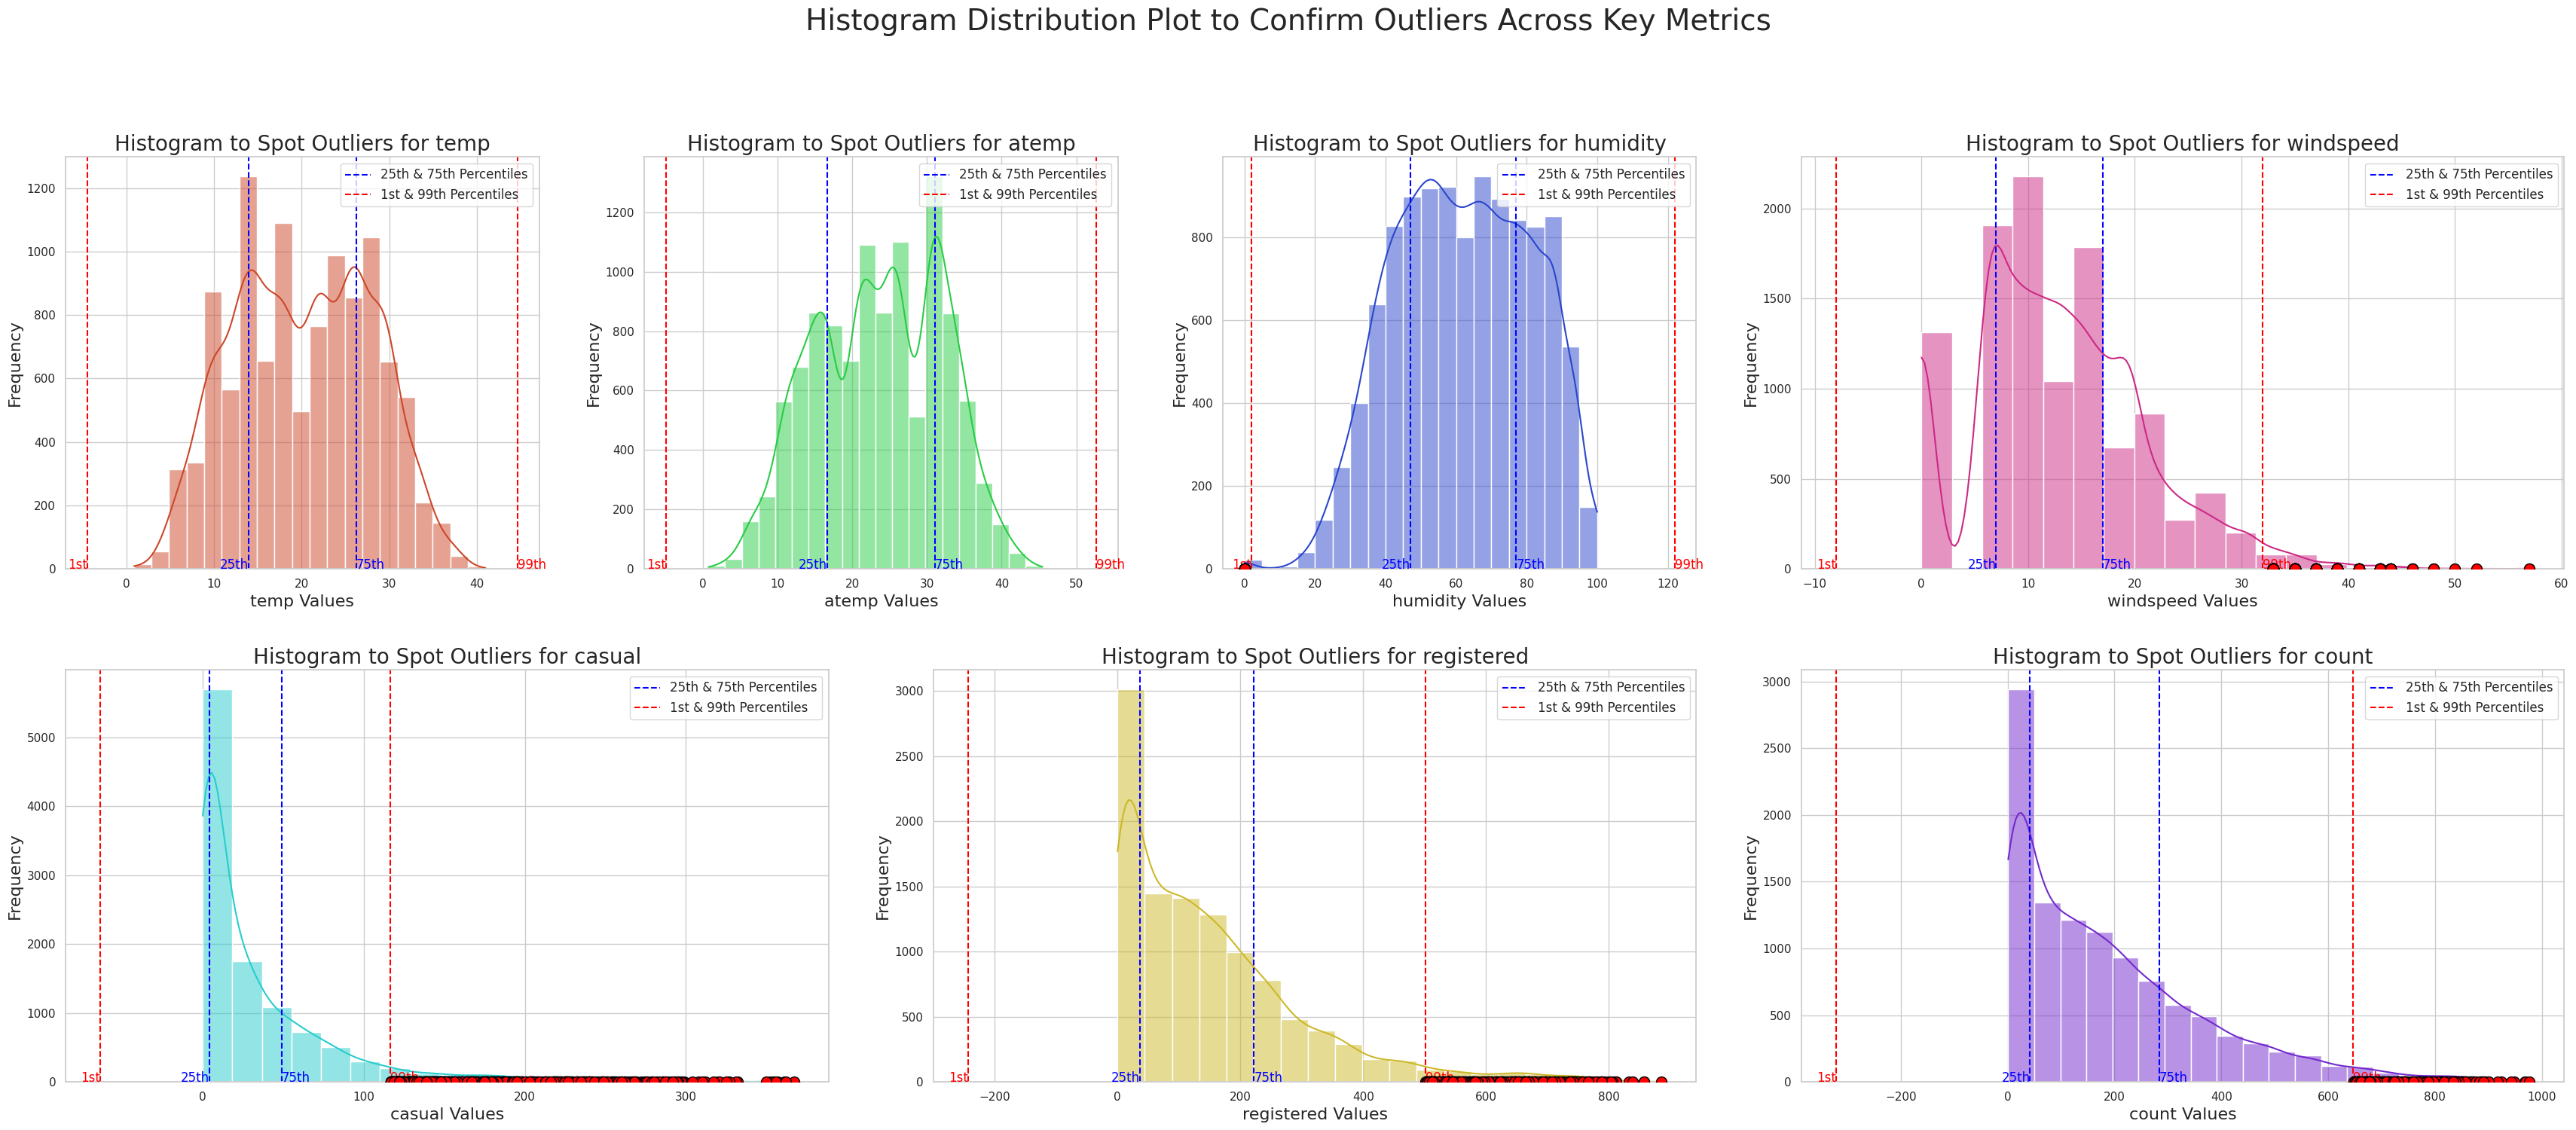

In [47]:
# Setup the figure and grid layout
sns.set(style="whitegrid")
fig = plt.figure(figsize=(35, 15))
gs = gridspec.GridSpec(2, 9)  # Define a grid with 2 rows and 9 columns

# Assign subplots to specific grid locations
ax1 = fig.add_subplot(gs[0, 0:2])  # First row, spans the first two of nine columns
ax2 = fig.add_subplot(gs[0, 2:4])  # First row, spans the next two of nine columns
ax3 = fig.add_subplot(gs[0, 4:6])  # First row, spans the next two of nine columns
ax4 = fig.add_subplot(gs[0, 6:9])  # First row, spans the last three of nine columns
ax5 = fig.add_subplot(gs[1, 0:3])  # Second row, spans the first three of nine columns
ax6 = fig.add_subplot(gs[1, 3:6])  # Second row, spans the next three of nine columns
ax7 = fig.add_subplot(gs[1, 6:9])  # Second row, spans the last three of nine columns

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

# Define a custom color palette
custom_palette = ["#CC4629", "#29CC46", "#2A46CC", "#CC2984", "#29CCCC", "#CCB829", "#7229CC"]

# Loop through each column and plot on the designated axes
for i, col in enumerate(columns):
    if i < len(axes):  # Ensure the number of columns is within the range of defined axes
        sns.histplot(df_raw[col], kde=True, color=custom_palette[i], ax=axes[i], bins=20)
        Q1 = df_raw[col].quantile(0.25)
        Q3 = df_raw[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify and highlight outliers with red circles
        outliers = df_raw[col][(df_raw[col] < lower_bound) | (df_raw[col] > upper_bound)]
        for outlier in outliers:
            axes[i].scatter(outlier, 0, color='red', s=100, edgecolor='black', zorder=5)

        # Set titles and labels with increased font size
        axes[i].set_title(f'Histogram to Spot Outliers for {col}', fontsize=20)
        axes[i].set_xlabel(f'{col} Values', fontsize=16)
        axes[i].set_ylabel('Frequency', fontsize=16)

        # Labeling percentiles
        axes[i].axvline(x=Q1, color='blue', linestyle='--', label='25th & 75th Percentiles')
        axes[i].axvline(x=Q3, color='blue', linestyle='--')
        axes[i].axvline(x=lower_bound, color='red', linestyle='--', label='1st & 99th Percentiles')
        axes[i].axvline(x=upper_bound, color='red', linestyle='--')
        axes[i].text(Q1, 0.5, '25th', color='blue', ha='right')
        axes[i].text(Q3, 0.5, '75th', color='blue', ha='left')
        axes[i].text(lower_bound, 0.5, '1st', color='red', ha='right')
        axes[i].text(upper_bound, 0.5, '99th', color='red', ha='left')

        axes[i].legend(loc='upper right', fontsize=12)

# Set a descriptive suptitle
plt.suptitle('Histogram Distribution Plot to Confirm Outliers Across Key Metrics', fontsize=28, y=1.02)
plt.tight_layout(pad=3.0)
plt.show()

#### **Insights on Distribution Plot to Confirm Outliers Across Key Metrics**  

###### **Temperature (Temp):**  
- **High Central Concentration**: Most temperature values **cluster around the median**, indicating a **moderate climate**.  
- **Few Extreme Days**: Only a **small number of days** have **extremely high or low temperatures**.  

###### **Apparent Temperature (Atemp):**  
- **Similar to Temp**: The **distribution of 'atemp' closely mirrors 'temp'**, showing **consistent perceived and actual temperatures**.  
- **Consistent Outlier Range**: **Outliers are minimal**, indicating **stable and predictable perceived temperatures**.  

###### **Humidity:**  
- **Wide Range of Normalcy**: Humidity is **mostly concentrated within a central range**, suggesting **varied weather conditions**.  
- **High Humidity Common**: **Few low humidity outliers** indicate that **dry days are rare**.  

###### **Windspeed:**  
- **Most Days are Calm**: The **bulk of windspeed values are low**, suggesting **generally calm conditions**.  
- **Extreme Winds Are Rare**: Only a **small fraction of days** experience **high winds**, marked as **outliers**.  

###### **Casual Users (Casual):**  
- **Skewed Towards Low Usage**: Most **casual rental counts are low**, indicating **occasional use**.  
- **Spikes on Specific Days**: **High outliers** may indicate **occasional days with unusually high casual rentals**, possibly **weekends or holidays**.  

###### **Registered Users (Registered):**  
- **Higher General Use**: **Registered user counts are higher and more evenly distributed**, indicating **consistent daily usage**.  
- **Fewer Extreme Values**: **Outliers are less pronounced** than in **casual usage**, showing **predictable patronage**.  

###### **Total Rentals (Count):**  
- **Broad Usage Spectrum**: **Total rentals show a broad spread**, indicating **both low and high usage days**.  
- **Peak Usage Outliers**: Some days have **exceptionally high rentals**, likely influenced by **external factors like weather or events**.  

###### **Seasonal Patterns:**  
- **Temperature Variability by Season**: **Outliers in temperature** could signify **seasonal extremes**.  
- **Usage Peaks Across Metrics**: **Outlier analysis** in **rentals** may reflect **seasonal peaks or special event days**.  

###### **Weather Impact:**  
- **Influence on Usage**: **Weather conditions** like **temperature and windspeed** directly affect **rental frequencies**.  
- **Adjustment for Outliers**: **Management strategies** can be **adjusted based on outlier analysis** to **better prepare for unusual weather**.  

###### **Operational Insights:**  
- **Preparedness for Extremes**: **Outlier spotting** helps in **planning for extreme weather conditions** and their **effects on rental demand**.  
- **Resource Allocation**: **Identifying outlier trends** in **user types** can help **allocate resources more effectively**, ensuring **availability during peak times**.  

These insights offer a **deeper understanding of how various factors influence rental patterns** and can aid **operational and strategic decisions** in the **context of a bike-sharing program**.  

---

### **7. Business Insights based on Non- Graphical and Visual Analysis**

###### **1. Comments on Range of Attributes and Outliers**  
- **Temperature and Apparent Temperature (Temp and Atemp):**  
  - Most values **cluster around the median** within a **moderate climate range**, indicating **stable temperatures** conducive to **outdoor activities**.  
  - **Outliers are minimal**, showcasing that **extreme temperatures are uncommon**, enhancing **comfort for activities like biking**.  
- **Humidity:**  
  - Shows a **broad range**, with most days exhibiting **varied humidity levels**.  
  - **High humidity** is **more common than very low humidity**, suggesting a **generally moist environment**.  
- **Windspeed:**  
  - **Typically low** across most observations, implying **predominantly calm conditions**.  
  - **Outlier days** with **significantly higher winds** indicate **occasional challenging biking conditions**.  
- **Casual and Registered Rentals:**  
  - **Casual rentals** display **high variability** and **notable outliers**, reflecting influence by **transient factors like weather and special events**.  
  - **Registered rentals** show **fewer outliers** and more **consistency**, indicating a **stable user base** likely related to **routine commuting**.  

###### **2. Comments on the Distribution of the Variables**  
- **Temperature Variables:**  
  - Both **temperature** and **apparent temperature** closely align, displaying a **near-perfect correlation and redundancy**.  
  - The **tight clustering** of these variables suggests **consistently moderate weather conditions** across the dataset.  
- **Humidity and Windspeed:**  
  - These variables show **varied impacts on bike rental frequency**, with **extremes affecting rentals less directly than temperature**.  
- **Rental Counts:**  
  - **Significant day-to-day variability** is observed, especially with **casual rentals** that are **highly responsive to external conditions**.  
  - **Registered rentals demonstrate a steadier pattern**, likely driven by **routine usage**.  

###### **3. Relationship Between Variables**  
- **Weather Conditions and Rentals:**  
  - **Favorable weather** significantly **boosts rental activities**, while **adverse weather sharply reduces them**.  
  - This **strong dependency on weather** highlights the **importance of good weather** for **higher rental frequencies**.  
- **Temporal Factors:**  
  - **Rentals are higher** during **typical commuting hours** and **warmer months**, indicating **significant temporal influences** on rental patterns.  

###### **4. Comments for Each Univariate and Bivariate Plot**  
- **Univariate Plots:**  
  - **Temperature and Rentals**: **Peak rentals occur** at temperatures around **23-24°C**, tapering off as **temperatures exceed 30°C**.  
  - **Humidity on Low Rental Days**: A **wide range of humidity levels** characterizes **low rental days**, with a **predominance of higher humidity**.  
- **Bivariate Plots:**  
  - **Season and Rentals**: **Fall sees the highest rentals**, with **Winter also showing strong rental activity**.  
  - **Holiday vs. Non-Holiday Rentals**: A **stark contrast** in rental volume highlights **non-holidays as key periods** for **higher rental activity**.  
  - **Working Days vs. Non-Working Days**: **Higher rentals on working days** underscore the **utility of bikes for commuting** rather than purely **recreational purposes**.  

These **organized insights provide a clear framework** for understanding **how different factors influence bike rental patterns**, which can be **pivotal in guiding operational decisions, marketing strategies, and service adaptations**.  

---
---

## **B) Hypothesis Testing**

### **1) 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented**

#### **Step 1 - Hypothesis Formulation**

**Null Hypothesis (H₀):** There is no significant difference in the number of electric cycles rented on working days compared to non-working days.

**Alternate Hypothesis (H₁):** There is a significant difference in the number of electric cycles rented on working days compared to non-working days.

#### **Step 2 - Check Assumptions of the Test**

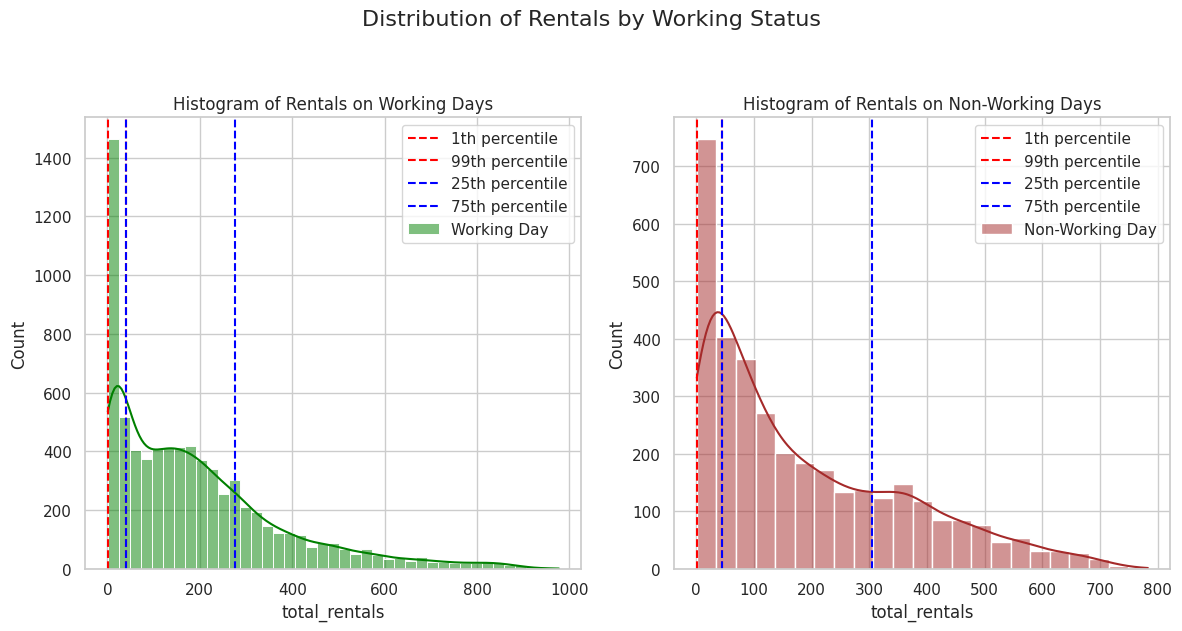

In [48]:
# 'workingday' is a column where Working indicates a working day and Non-Working indicates a non-working day
working_day = df[df['workingday'] == 'Working']['total_rentals']
non_working_day = df[df['workingday'] == 'Non-Working']['total_rentals']

# Calculate percentiles for aesthetic lines on histograms
percentiles_working = np.percentile(working_day, [1, 25, 75, 99])
percentiles_non_working = np.percentile(non_working_day, [1, 25, 75, 99])

# Plot histograms and kernel density estimates to check distribution visually
plt.figure(figsize=(12, 6))

# Histogram for rentals on working days
plt.subplot(1, 2, 1)
sns.histplot(working_day, kde=True, color='green', label='Working Day')
for percentile, color in zip([1, 99], ['red']*2):
    plt.axvline(x=percentiles_working[percentile//98], color=color, linestyle='--', label=f'{percentile}th percentile')
for percentile, color in zip([25, 75], ['blue']*2):
    plt.axvline(x=percentiles_working[(percentile-25)//50 + 1], color=color, linestyle='--', label=f'{percentile}th percentile')
plt.title('Histogram of Rentals on Working Days')
plt.legend()

# Histogram for rentals on non-working days
plt.subplot(1, 2, 2)
sns.histplot(non_working_day, kde=True, color='brown', label='Non-Working Day')
for percentile, color in zip([1, 99], ['red']*2):
    plt.axvline(x=percentiles_non_working[percentile//98], color=color, linestyle='--', label=f'{percentile}th percentile')
for percentile, color in zip([25, 75], ['blue']*2):
    plt.axvline(x=percentiles_non_working[(percentile-25)//50 + 1], color=color, linestyle='--', label=f'{percentile}th percentile')
plt.title('Histogram of Rentals on Non-Working Days')
plt.legend()

# Adding a super title to the entire figure
plt.suptitle('Distribution of Rentals by Working Status', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

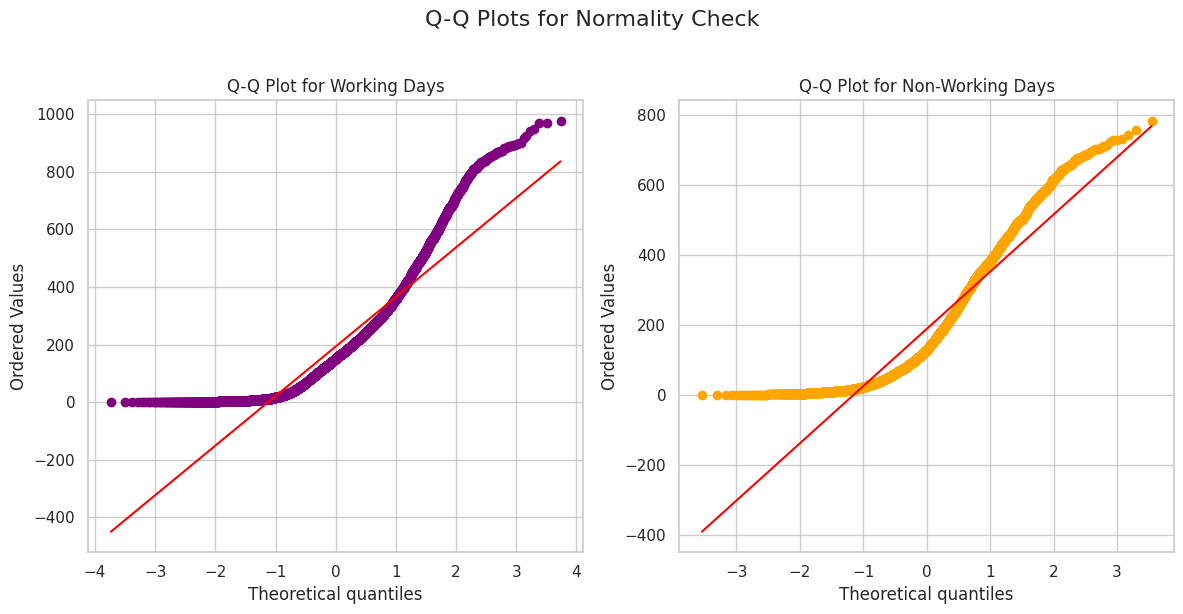

In [49]:
# Plot Q-Q plots to check for normality by comparing the quantiles of each distribution to a standard normal distribution
plt.figure(figsize=(12, 6))

# Q-Q plot for Working Days
plt.subplot(1, 2, 1)
stats.probplot(working_day, dist="norm", plot=plt)
plt.gca().get_lines()[0].set_color('purple')  # Set color for the Q-Q points
plt.gca().get_lines()[1].set_color('red')
plt.title('Q-Q Plot for Working Days')  # Using blue color for the title

# Q-Q plot for Non-Working Days
plt.subplot(1, 2, 2)
stats.probplot(non_working_day, dist="norm", plot=plt)
plt.gca().get_lines()[0].set_color('orange')  # Set color for the Q-Q points
plt.gca().get_lines()[1].set_color('red')
plt.title('Q-Q Plot for Non-Working Days')  # Using green color for the title

# Adding a super title to the entire figure
plt.suptitle('Q-Q Plots for Normality Check', fontsize=16, y=1.02)

# Display the plot
plt.tight_layout()
plt.show()

In [50]:
# Perform Shapiro-Wilk Test for normality on both distributions
shapiro_working = stats.shapiro(working_day)
shapiro_non_working = stats.shapiro(non_working_day)

# Print Shapiro-Wilk Test results
print("Shapiro-Wilk Test for Normality")
print("-------------------------------")
print(f"Working Day: Statistics={shapiro_working[0]:.4f}, p-value={shapiro_working[1]:.4g}")
print(f"Non-Working Day: Statistics={shapiro_non_working[0]:.4f}, p-value={shapiro_non_working[1]:.4g}")

# Perform Levene's Test for equality of variances
levene_test = stats.levene(working_day, non_working_day)

# Print Levene's Test results
print("\nLevene's Test for Equality of Variances")
print("---------------------------------------")
print(f"Statistic={levene_test[0]:.4f}, p-value={levene_test[1]:.4g}")

Shapiro-Wilk Test for Normality
-------------------------------
Working Day: Statistics=0.8703, p-value=2.252e-61
Non-Working Day: Statistics=0.8852, p-value=4.473e-45

Levene's Test for Equality of Variances
---------------------------------------
Statistic=0.0050, p-value=0.9438


#### **Step 3 - Set a Significance Level (α)**

The **significance level (α)** represents the probability of rejecting the null hypothesis when it is actually true.

For this study, we set **α = 0.05** (5%), which is a commonly used threshold in hypothesis testing.

- If the **p-value ≤ 0.05**, we reject the null hypothesis (H₀), indicating a significant difference in the number of electric cycles rented.
- If the **p-value > 0.05**, we fail to reject the null hypothesis (H₀), meaning there is no significant difference.

This significance level ensures a balance between Type I (false positive) and Type II (false negative) errors.


In [51]:
# Define the significance level
alpha = 0.05

# Interpret Shapiro-Wilk Test Results
print("Interpreting Shapiro-Wilk Test Results :-")
if shapiro_working[1] < alpha:
    print("Result: Working Day rentals distribution is not normal.")
else:
    print("Result: Working Day rentals distribution is normal.")

if shapiro_non_working[1] < alpha:
    print("Result: Non-Working Day rentals distribution is not normal.")
else:
    print("Result: Non-Working Day rentals distribution is normal.")

# Interpret Levene's Test Results
print("\nInterpreting Levene's Test Results :- ")
if levene_test[1] < alpha:
    print("Result: Variances are not equal between Working and Non-Working Day rentals.")
else:
    print("Result: Variances are equal between Working and Non-Working Day rentals.")


Interpreting Shapiro-Wilk Test Results :-
Result: Working Day rentals distribution is not normal.
Result: Non-Working Day rentals distribution is not normal.

Interpreting Levene's Test Results :- 
Result: Variances are equal between Working and Non-Working Day rentals.


#### **Step 4 - Calculate Test Statistics**

In [52]:
# T-Test
t_stat, p_value = stats.ttest_ind(working_day, non_working_day, equal_var=True)
print(f"T-Test Statistic: {t_stat}, P-Value: {p_value}")

T-Test Statistic: 1.2096277376026694, P-Value: 0.22644804226361348


#### **Step 5 -  Decision to Accept or Reject the Null Hypothesis**

#### Comparing **p-value** from the **2-Sample t-test** with **Significance Level (α = 0.05)**

#### **Decision Rule:**
- **If p-value ≤ 0.05:**  
  - **Reject H₀** → Conclude that **there is a significant difference** in rentals between working and non-working days.  

- **If p-value > 0.05:**  
  - **Fail to reject H₀** → Conclude that **there is no significant difference** in rentals between working and non-working days.  


In [53]:
# Decision based on p-value
if p_value <= alpha:
    print("Reject the null hypothesis - there is a significant difference in rentals.")
else:
    print("Fail to reject the null hypothesis - there is no significant difference in rentals.")

Fail to reject the null hypothesis - there is no significant difference in rentals.


#### **Step 6 - Inference from the Analysis**

- **If H₀ is rejected (p-value ≤ 0.05):**  
  - The number of rentals **differs significantly** between working and non-working days.  
  - This suggests that people **rent cycles more or less depending on whether it is a working day**.  

- **If H₀ is not rejected (p-value > 0.05):**  
  - There is **no statistical evidence** to suggest that working days impact the number of rentals.  
  - This implies that **rental patterns remain relatively consistent, regardless of the work schedule**.  

In [54]:
# Inference
if p_value <= alpha:
    print("Working days might have a significant effect on the number of electric cycles rented.")
else:
    print("There is no significant effect of working days on the number of electric cycles rented.")

There is no significant effect of working days on the number of electric cycles rented.


#### **Step 7 - Visual Analysis and Conclusion**

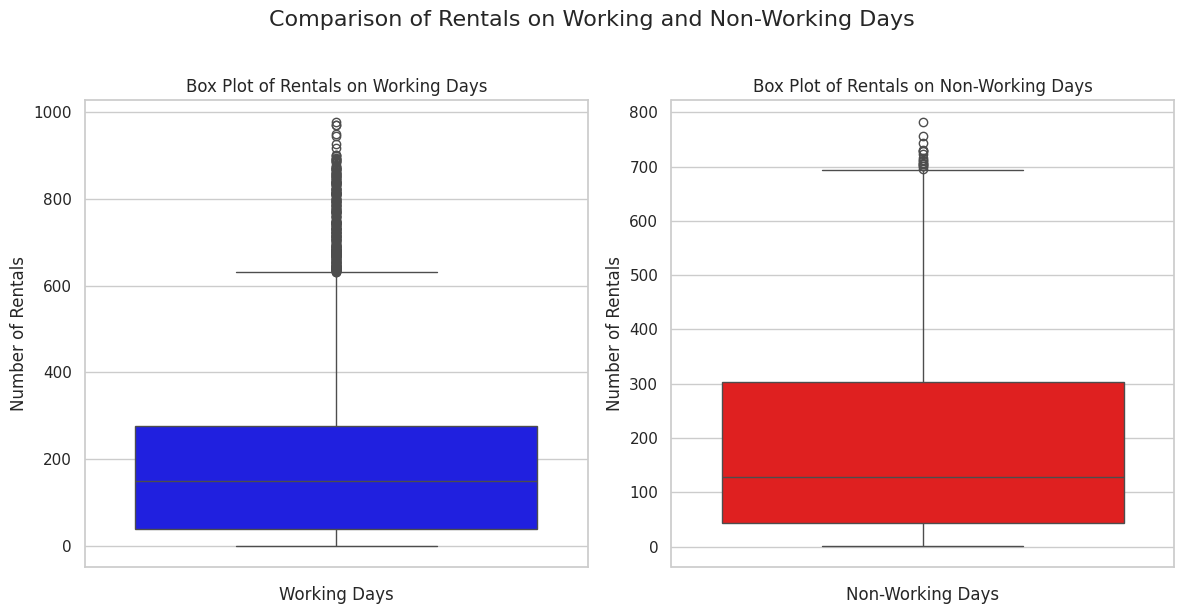

Based on the p-value of 0.22644804226361348 compared to an alpha of 0.05, the conclusion is:
There is no statistically significant difference in the number of rentals between working and non-working days.


In [55]:
# Set the figsize
plt.figure(figsize=(12, 6))

# Box plot for Working Days
plt.subplot(1, 2, 1)
sns.boxplot(data=working_day, color='blue')
plt.title('Box Plot of Rentals on Working Days')
plt.ylabel('Number of Rentals')
plt.xlabel('Working Days')

# Box plot for Non-Working Days
plt.subplot(1, 2, 2)
sns.boxplot(data=non_working_day, color='red')
plt.title('Box Plot of Rentals on Non-Working Days')
plt.ylabel('Number of Rentals')
plt.xlabel('Non-Working Days')

# Adding a super title to the entire figure
plt.suptitle('Comparison of Rentals on Working and Non-Working Days', fontsize=16, y=1.02)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Conclusion based on the analysis
print(f"Based on the p-value of {p_value} compared to an alpha of {alpha}, the conclusion is:")
if p_value <= alpha:
    print("There is a statistically significant difference in the number of rentals between working and non-working days.")
else:
    print("There is no statistically significant difference in the number of rentals between working and non-working days.")

#### **Insights on Statistical Analysis of Bike Rentals: Working vs. Non-Working Days**  

###### **No Significant Difference in Rentals**  
- The **T-test resulted in a p-value of 0.226**, indicating **no significant statistical difference** in rentals between **working and non-working days**.  
- This suggests that the **type of day does not significantly influence** the rental numbers of **electric cycles**.  

###### **Data Distribution Characteristics**  
- **Shapiro-Wilk tests confirm** that neither **working nor non-working days' rental distributions are normal**, as their **p-values are significantly low**.  
- Despite the **non-normality**, we proceeded with the **T-test** due to the **central limit theorem**, which applies given a **sufficiently large sample size**.  

###### **Equal Variance Assumption Validated**  
- **Levene’s test yielded a p-value of 0.9438**, suggesting that the **variance in the number of rentals** is **similar for both working and non-working days**.  
- **Equal variances** justify the use of the **standard two-sample T-test** without modifications.  

###### **Visual Analysis of Data**  
- **Box plots reveal** that the **median rentals** and **interquartile ranges** are **relatively similar** for both categories, aligning with the **T-test outcome**.  
- **Histograms and Q-Q plots** illustrated the **skewness in data**, with most rental counts **clustering at the lower end** for both **working and non-working days**.  

###### **Implications for Business Operations**  
- Since there’s **no significant difference** in rentals between **day types**, **promotions or incentives** might **not need to be day-specific**.  
- **Management can allocate resources uniformly** across all days or explore **other factors** that might **play a greater role** in influencing **rental patterns**.  

These insights help underscore the **complexity of demand dynamics** in bike rentals and suggest that **factors other than whether a day is a working day or not** might be **more influential** in driving **rental volume**.  

---

### **2) ANOVA to check if No. of cycles rented is similar or different in different 1.weather 2. season**

#### **Step 1 - Hypothesis Formulation**

**Null Hypothesis (H₀):** There is no difference in the average number of cycles rented across different weather conditions and seasons.  

**Alternate Hypothesis (H₁):** There is a difference in the average number of cycles rented across different weather conditions and/or seasons.


#### **Step 2 - Check Assumptions of the Test**

#### **Assumptions for ANOVA :-**

1. **Independence:**  
   - This is usually assured by the design of the study.  
   - Confirm that the data collection methods support this (e.g., rentals are recorded independently across different days or sessions).  

2. **Normality:**  
   - Check normality by plotting **histograms** and **Q-Q plots** of rentals within each group defined by season and weather.  

3. **Homogeneity of Variance:**  
   - Test for equal variances using **Levene's test** to ensure the assumption holds.   


#### **Part 1: Check Assumptions for Weather**

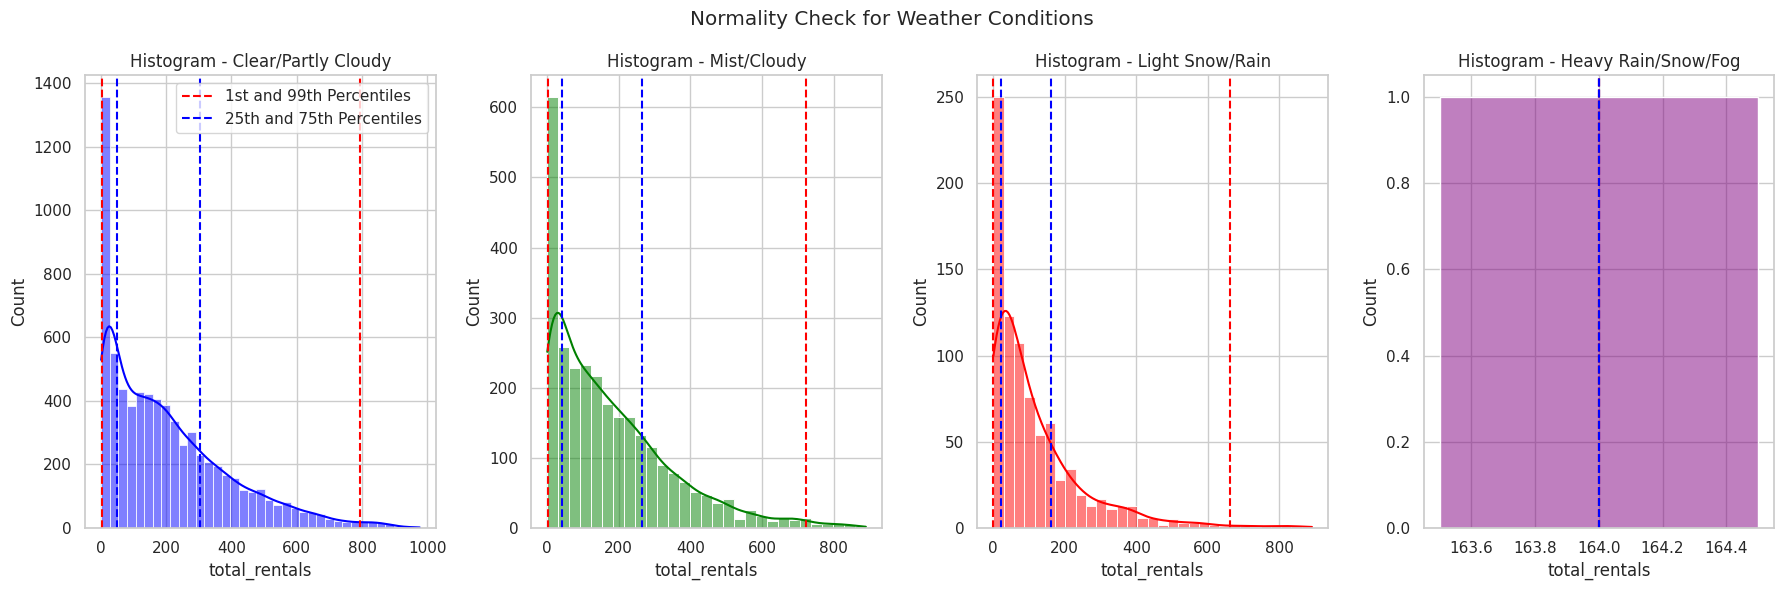

In [56]:
# Retrieve unique weather conditions from the DataFrame
weather_types = df['weather'].unique()

# Initialize a large figure to accommodate subplots for each weather condition
plt.figure(figsize=(18, 6))

# Colors list for visual differentiation of weather conditions in the plot
colors = ['blue', 'green', 'red', 'purple']

# Loop through each unique weather condition and create a histogram
for i, weather in enumerate(weather_types):
    # Create a subplot for each weather condition
    plt.subplot(1, len(weather_types), i+1)
    # Data for current weather condition
    data = df[df['weather'] == weather]['total_rentals']
    # Plot histogram with Kernel Density Estimate (KDE)
    sns.histplot(data, kde=True, color=colors[i])
    # Set title with the current weather condition
    plt.title(f'Histogram - {weather}')

    # Calculate percentiles and plot vertical lines
    percentiles = np.percentile(data, [1, 25, 75, 99])
    # Plot 1st and 99th percentiles with red dashed lines
    plt.axvline(x=percentiles[0], color='red', linestyle='--', label='1st and 99th Percentiles')
    plt.axvline(x=percentiles[3], color='red', linestyle='--')
    # Plot 25th and 75th percentiles with blue dashed lines
    plt.axvline(x=percentiles[1], color='blue', linestyle='--', label='25th and 75th Percentiles')
    plt.axvline(x=percentiles[2], color='blue', linestyle='--')

    # Add legend to the first subplot only to avoid repetition
    if i == 0:
        plt.legend()

# Add an overall title for all subplots and adjust layout to prevent overlap
plt.suptitle('Normality Check for Weather Conditions')
plt.tight_layout()
plt.show()

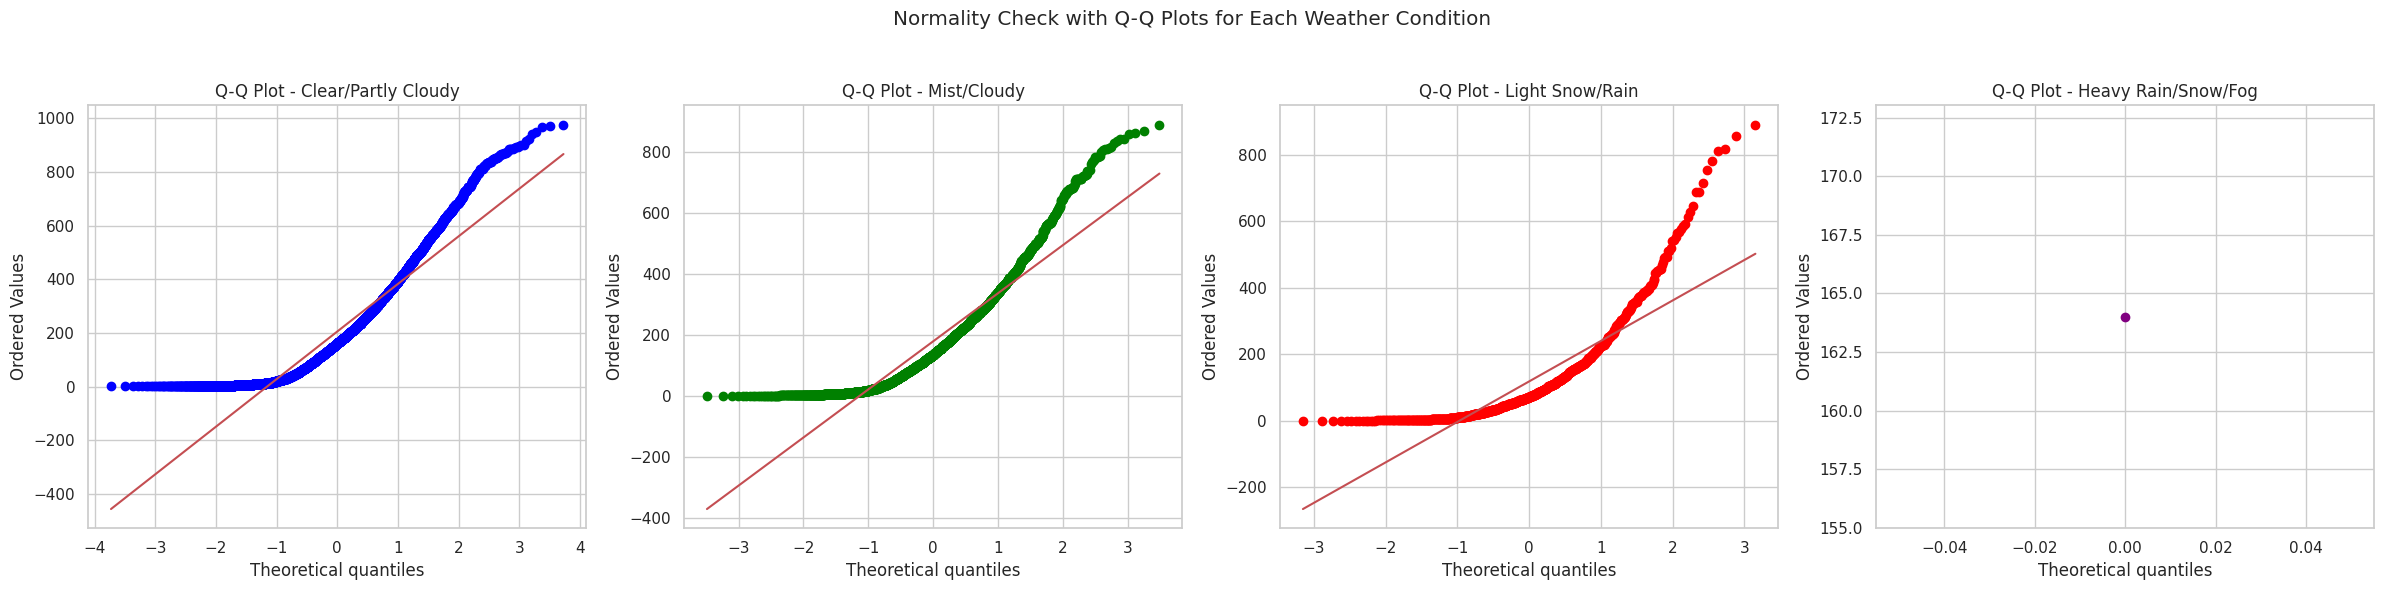

In [57]:
# Define the number of plots, which should be based on the number of unique weather conditions
n_plots = len(weather_types)

# Initialize the figure with appropriate size to accommodate all subplots
plt.figure(figsize=(6 * n_plots, 6))

# Loop through each unique weather condition to generate a Q-Q plot
for i, weather in enumerate(weather_types):
    # Create a subplot for each weather condition
    plt.subplot(1, n_plots, i + 1)
    # Generate a Q-Q plot for total rentals under current weather condition
    stats.probplot(df[df['weather'] == weather]['total_rentals'], dist="norm", plot=plt)
    plt.gca().get_lines()[0].set_color(colors[i])  # Set color for the Q-Q points
    # Set title for each subplot with the current weather condition
    plt.title(f'Q-Q Plot - {weather}')

# Add an overall title for all subplots and adjust layout to prevent overlap
plt.suptitle('Normality Check with Q-Q Plots for Each Weather Condition')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect to fit the suptitle above the subplots
plt.show()

In [58]:
# Check homogeneity of variances using Levene's test
weather_groups = [df[df['weather'] == weather]['total_rentals'] for weather in weather_types]
lev_weather = stats.levene(*weather_groups)

# Print the test results
print("Levene's test for equal variances (Weather):")
print(f"  - Statistic = {lev_weather.statistic:.4f}")
print(f"  - p-value = {lev_weather.pvalue:.4g}")

Levene's test for equal variances (Weather):
  - Statistic = 54.8511
  - p-value = 3.505e-35


#### **Part 2: Check Assumptions for Season**

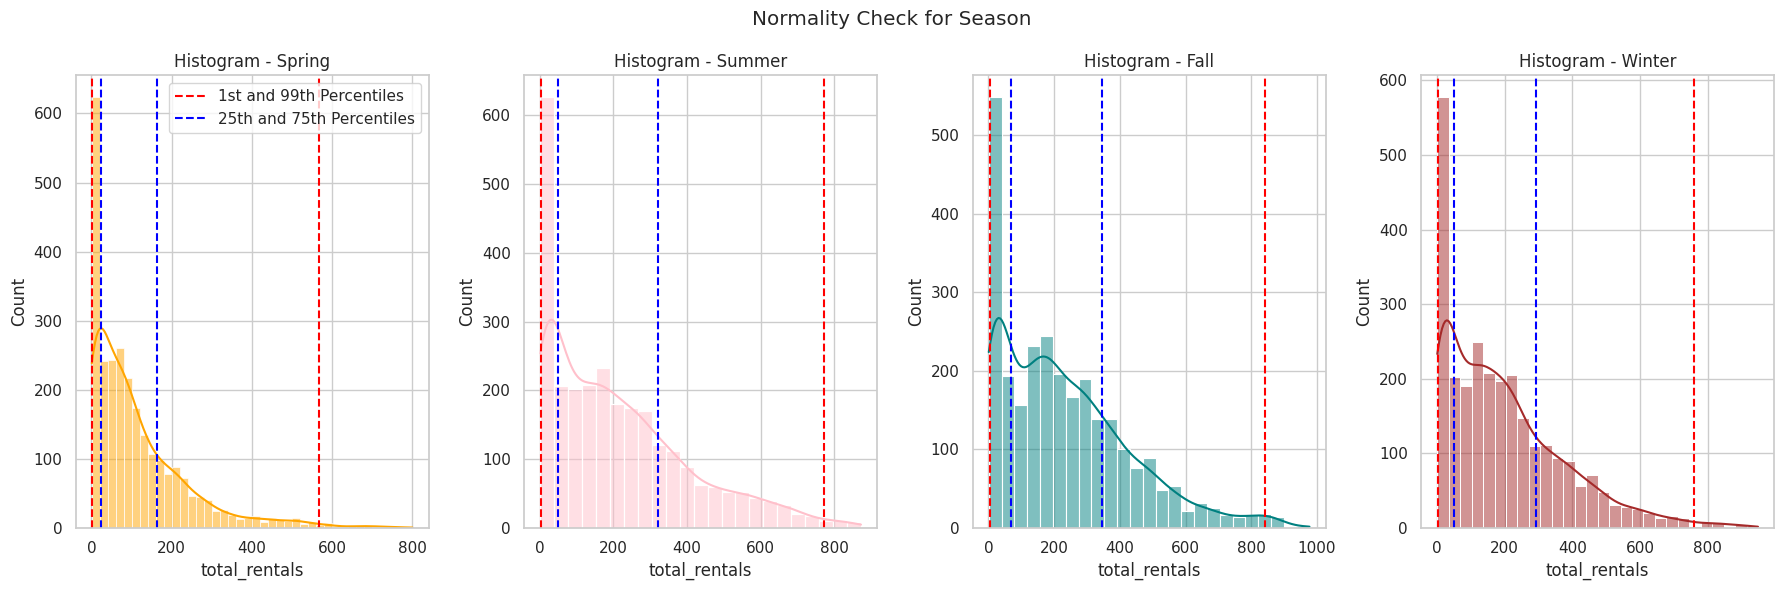

In [59]:
# Retrieve unique season from the DataFrame
season_types = df['season'].unique()

# Initialize a large figure to accommodate subplots for each season
plt.figure(figsize=(18, 6))

# Colors list for visual differentiation of season in the plot
colors = ['orange', 'pink', 'teal', 'brown']

# Loop through each unique season and create a histogram
for i, season in enumerate(season_types):
    # Create a subplot for each season
    plt.subplot(1, len(season_types), i+1)
    # Data for current season
    data = df[df['season'] == season]['total_rentals']
    # Plot histogram with Kernel Density Estimate (KDE)
    sns.histplot(data, kde=True, color=colors[i])
    # Set title with the current season
    plt.title(f'Histogram - {season}')

    # Calculate percentiles and plot vertical lines
    percentiles = np.percentile(data, [1, 25, 75, 99])
    # Plot 1st and 99th percentiles with red dashed lines
    plt.axvline(x=percentiles[0], color='red', linestyle='--', label='1st and 99th Percentiles')
    plt.axvline(x=percentiles[3], color='red', linestyle='--')
    # Plot 25th and 75th percentiles with blue dashed lines
    plt.axvline(x=percentiles[1], color='blue', linestyle='--', label='25th and 75th Percentiles')
    plt.axvline(x=percentiles[2], color='blue', linestyle='--')

    # Add legend to the first subplot only to avoid repetition
    if i == 0:
        plt.legend()

# Add an overall title for all subplots and adjust layout to prevent overlap
plt.suptitle('Normality Check for Season')
plt.tight_layout()
plt.show()

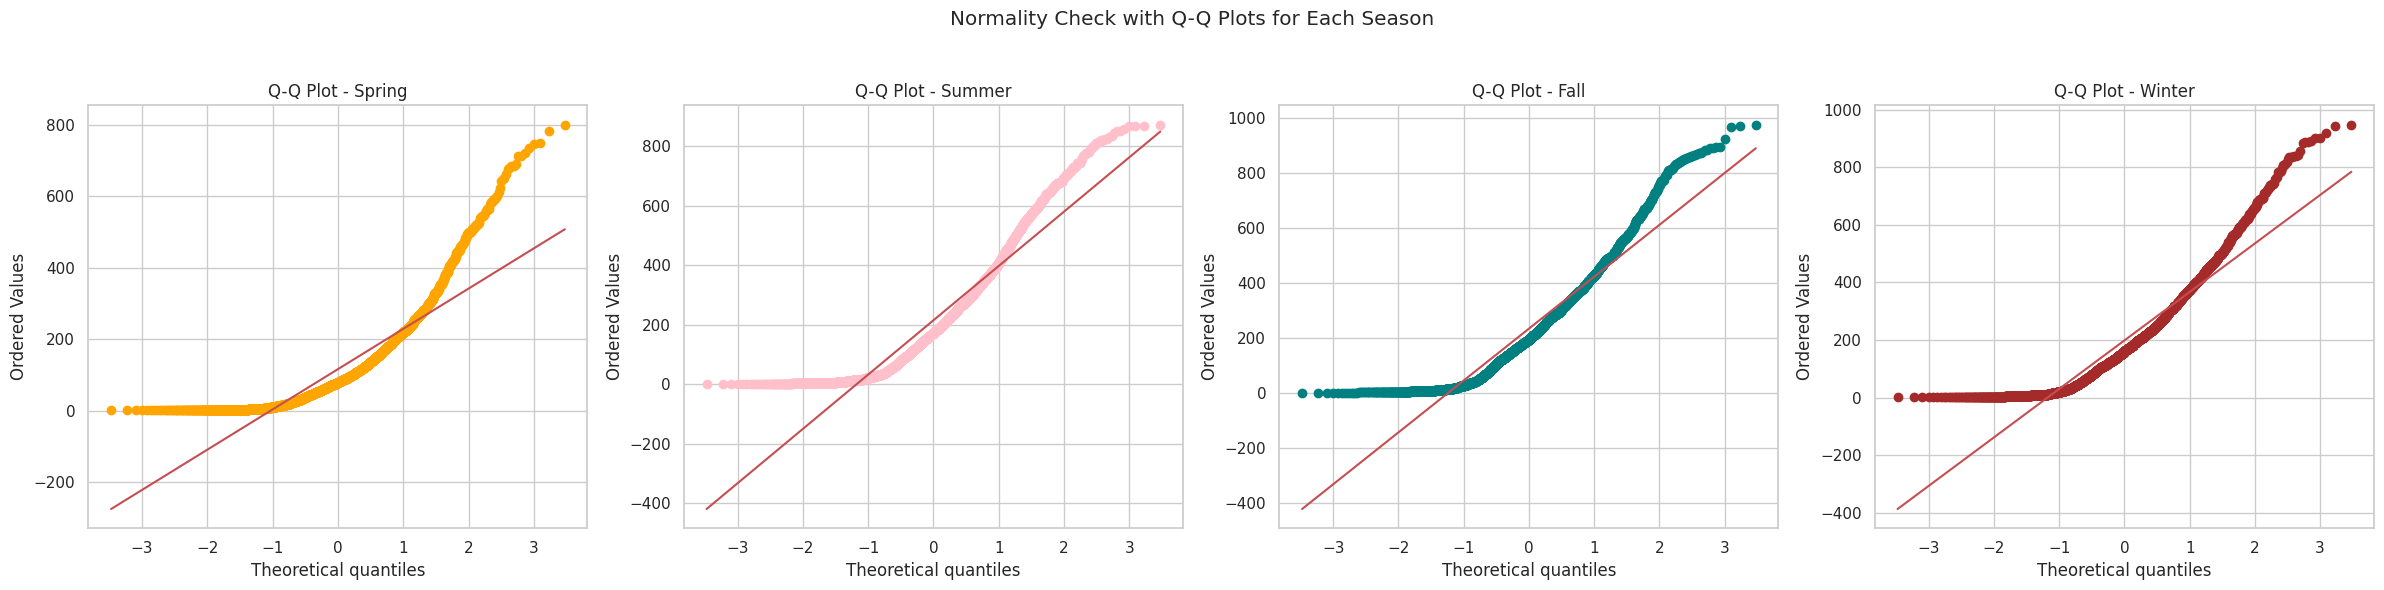

In [60]:
# Define the number of plots, which should be based on the number of unique season
n_plots = len(season_types)

# Initialize the figure with appropriate size to accommodate all subplots
plt.figure(figsize=(6 * n_plots, 6))

# Loop through each unique weather condition to generate a Q-Q plot
for i, season in enumerate(season_types):
    # Create a subplot for each season
    plt.subplot(1, n_plots, i + 1)
    # Generate a Q-Q plot for total rentals under current season
    stats.probplot(df[df['season'] == season]['total_rentals'], dist="norm", plot=plt)
    plt.gca().get_lines()[0].set_color(colors[i])  # Set color for the Q-Q points
    # Set title for each subplot with the current season
    plt.title(f'Q-Q Plot - {season}')

# Add an overall title for all subplots and adjust layout to prevent overlap
plt.suptitle('Normality Check with Q-Q Plots for Each Season')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect to fit the suptitle above the subplots
plt.show()

In [61]:
# Check homogeneity of variances using Levene's test
season_groups = [df[df['season'] == season]['total_rentals'] for season in season_types]
lev_season = stats.levene(*season_groups)

# Print the test results
print("Levene's test for equal variances (Season):")
print(f"  - Statistic = {lev_season.statistic:.4f}")
print(f"  - p-value = {lev_season.pvalue:.4g}")

Levene's test for equal variances (Season):
  - Statistic = 187.7707
  - p-value = 1.015e-118


#### **Step 3 - Set a Significance Level (α)**

For this study, we set **α = 0.05 (5%)**, which is a commonly used threshold in hypothesis testing.

##### **What it Means:**  
Setting **α = 0.05** means there is a **5% chance of rejecting the null hypothesis when it is actually true** (Type I error).

##### **Application:**
- If the **p-value ≤ 0.05**, we **reject the null hypothesis (H₀)**, indicating a statistically significant difference in the number of cycles rented across different weather conditions or seasons.
- If the **p-value > 0.05**, we **fail to reject the null hypothesis (H₀)**, meaning there is no significant difference.


In [62]:
# Define the significance level
alpha = 0.05

# Print the conclusion based on p-value for weather
conclusion = "Variances are not equal (reject H0)." if lev_weather.pvalue < 0.05 else "Variances are equal (fail to reject H0)."
print(f"Conclusion for Weather: {conclusion}")

# Print the conclusion based on p-value for season
conclusion = "Variances are not equal (reject H0)." if lev_season.pvalue < 0.05 else "Variances are equal (fail to reject H0)."
print(f"Conclusion for Season: {conclusion}")


Conclusion for Weather: Variances are not equal (reject H0).
Conclusion for Season: Variances are not equal (reject H0).


#### **Step 4: Calculate Test Statistics**

In [63]:
# ANOVA for Weather Conditions

# Prepare the OLS model for the influence of different weather conditions on total bike rentals
model_weather = ols('total_rentals ~ C(weather)', data=df).fit()

# Conduct ANOVA on the OLS model to test the hypothesis that different weather conditions have the same effect
anova_weather = sm.stats.anova_lm(model_weather, typ=2)
p_value_weather = anova_weather['PR(>F)'].iloc[0]  # Extract p-value for weather

print("ANOVA for Different Weather Conditions:")
print(anova_weather)

# Print the p-value for weather conditions
print(f"\nP-value for weather conditions: {p_value_weather}\n")

# ANOVA for Seasons

# Prepare the OLS model for the influence of different seasons on total bike rentals
model_season = ols('total_rentals ~ C(season)', data=df).fit()

# Conduct ANOVA on the OLS model to test the hypothesis that different seasons have the same effect
anova_season = sm.stats.anova_lm(model_season, typ=2)
p_value_season = anova_season['PR(>F)'].iloc[0]  # Extract p-value for seasons

print("ANOVA for Different Seasons:")
print(anova_season)

# Print the p-value for seasons
print(f"\nP-value for seasons: {p_value_season}")

ANOVA for Different Weather Conditions:
                  sum_sq       df          F        PR(>F)
C(weather)  6.338070e+06      3.0  65.530241  5.482069e-42
Residual    3.508348e+08  10882.0        NaN           NaN

P-value for weather conditions: 5.4820694759593526e-42

ANOVA for Different Seasons:
                 sum_sq       df           F         PR(>F)
C(season)  2.190083e+07      3.0  236.946711  6.164843e-149
Residual   3.352721e+08  10882.0         NaN            NaN

P-value for seasons: 6.164843386424311e-149


#### **Step 5: Decision to Accept or Reject the Null Hypothesis**

Using the p-value obtained from the ANOVA test, we decide whether to reject or fail to reject the null hypothesis based on the predefined significance level (α = 0.05).

- **If p-value ≤ 0.05:**  
  - **Reject the null hypothesis (H₀).**  
  - This indicates a statistically significant difference in the number of cycles rented across the different categories being tested (weather conditions, seasons, or both).  
  - It suggests that the factor being analyzed does influence the rental numbers.

- **If p-value > 0.05:**  
  - **Fail to reject the null hypothesis (H₀).**  
  - There is not enough statistical evidence to conclude that the different categories affect the number of cycles rented.  
  - The observed differences could be due to random variation.


In [64]:
if p_value_weather <= alpha:
    print("Reject the null hypothesis for weather conditions - significant effect detected.")
else:
    print("Fail to reject the null hypothesis for weather conditions - no significant effect detected.")

if p_value_season <= alpha:
    print("Reject the null hypothesis for seasons - significant effect detected.")
else:
    print("Fail to reject the null hypothesis for seasons - no significant effect detected.")

Reject the null hypothesis for weather conditions - significant effect detected.
Reject the null hypothesis for seasons - significant effect detected.


#### **Step 6: Inference from the Analysis**

Once a decision is made regarding the null hypothesis, the next step is to interpret the results in a real-world context.

- **If the Null Hypothesis is Rejected (p-value ≤ 0.05):**  
  - Conclude that there is a **statistically significant difference** in the number of cycles rented among different weather conditions or seasons.  
  - This suggests that these factors **influence rental patterns**, meaning certain weather conditions or seasons may be more conducive to cycle rentals than others.

- **If the Null Hypothesis is Not Rejected (p-value > 0.05):**  
  - Conclude that there is **no statistically significant evidence** that weather conditions or seasons affect the number of cycles rented.  
  - This implies that **other factors** might have a greater influence on rental volumes, or that the variations due to weather and seasons are **not strong enough to be detected** by this analysis.


In [65]:
if p_value_weather <= alpha:
    print("Weather conditions have a statistically significant impact on bike rentals.")
else:
    print("Weather conditions do not have a statistically significant impact on bike rentals.")

if p_value_season <= alpha:
    print("Seasonal changes have a statistically significant impact on bike rentals.")
else:
    print("Seasonal changes do not have a statistically significant impact on bike rentals.")

Weather conditions have a statistically significant impact on bike rentals.
Seasonal changes have a statistically significant impact on bike rentals.


#### **Step 7: Visual Analysis and Conclusion**

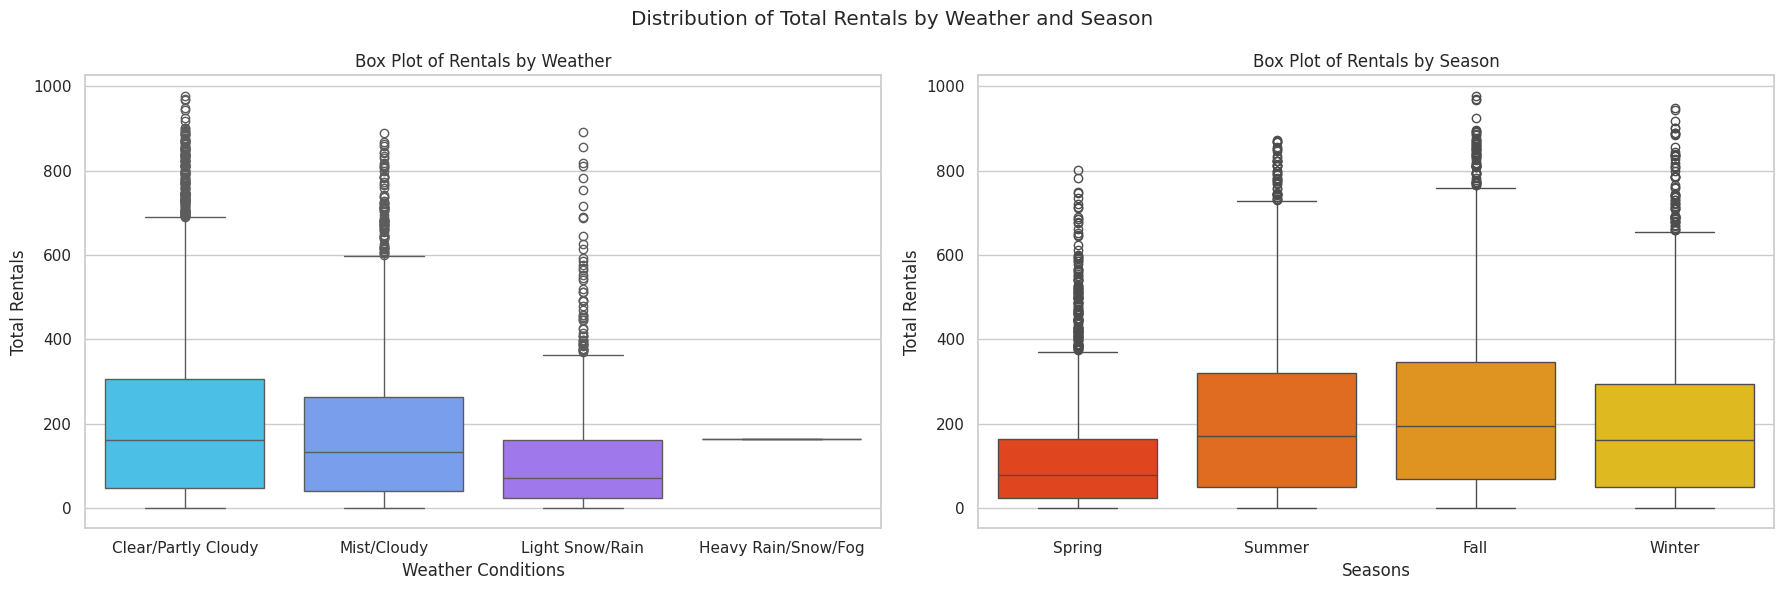

Conclusion based on ANOVA tests:
Weather conditions significantly affect cycle rentals.
Seasonal changes significantly affect cycle rentals.


In [66]:
# Initialize the figure with specified dimensions to fit the two subplots comfortably
plt.figure(figsize=(18, 6))

# Plotting the box plot for rentals by different weather conditions
plt.subplot(1, 2, 1)
sns.boxplot(x='weather', y='total_rentals', data=df, palette='cool')  # Using a 'cool' color palette for visual appeal
plt.title('Box Plot of Rentals by Weather')
plt.xlabel('Weather Conditions')
plt.ylabel('Total Rentals')

# Plotting the box plot for rentals by season
plt.subplot(1, 2, 2)
sns.boxplot(x='season', y='total_rentals', data=df, palette='autumn')  # Using an 'autumn' color palette
plt.title('Box Plot of Rentals by Season')
plt.xlabel('Seasons')
plt.ylabel('Total Rentals')

# Set an overall title for the figure to provide context for the box plots
plt.suptitle('Distribution of Total Rentals by Weather and Season')

# Adjust the layout to prevent any overlap of plots
plt.tight_layout()
plt.show()

# Conclusion based on the ANOVA tests:
print("Conclusion based on ANOVA tests:")

# Checking the p-value for the ANOVA test on weather conditions to conclude
if anova_weather['PR(>F)'][0] < alpha:
    print("Weather conditions significantly affect cycle rentals.")
else:
    print("Weather conditions do not significantly affect cycle rentals.")

# Checking the p-value for the ANOVA test on seasonal changes to conclude
if anova_season['PR(>F)'][0] < alpha:
    print("Seasonal changes significantly affect cycle rentals.")
else:
    print("Seasonal changes do not significantly affect cycle rentals.")

#### **Insights on Statistical Analysis of Bike Rentals: Weather and Seasonal Impact**  

###### **Weather Impact on Rentals**  
- **Significant differences** exist among various **weather conditions**, indicating that **weather significantly influences rental behavior**.  
- **Clear/Partly Cloudy** weather sees **higher rentals**, suggesting that **favorable conditions increase cycling activity**.  

###### **Seasonal Influence on Rentals**  
- Rentals vary **significantly across seasons**, with **Summer and Fall** showing **higher rental numbers** than **Winter and Spring**.  
- This variation underscores the **preference for cycling during warmer, more predictable weather conditions**.  

###### **Data Distribution and Normality**  
- **Rental distributions** for each **weather condition and season** show **significant skewness**, suggesting **non-normal distributions**.  
- Despite these deviations, **ANOVA was applied** due to its **robustness to non-normality** with **large sample sizes**.  

###### **Variance Homogeneity**  
- **Levene’s test** indicated **non-homogeneous variances** across different **weather and seasonal groups**, which could **impact the reliability of ANOVA results**.  
- This suggests exploring **data transformations** or **non-parametric tests** as alternative analytical approaches.  

###### **Practical Implications for Business**  
- Understanding **which seasons and weather conditions favor higher rentals** can help in **strategic planning for marketing and resource allocation**.  
- Tailoring **promotions and availability** of rental cycles to match these patterns could **optimize operations and enhance profitability**.  

The analysis clearly demonstrates that both **weather and seasonal variations significantly affect cycle rentals**. Businesses should **leverage this information** to **optimize operational strategies** and **maximize user engagement** based on **weather and seasonal trends**.  

----

### **3) Chi-square test to check if Weather is dependent on the season.**

#### **Step 1: Hypothesis Formulation**

**Null Hypothesis (H₀):** Weather is independent of the season.  

**Alternate Hypothesis (H₁):** Weather is dependent on the season.  


#### **Step 2: Check Assumptions of the Test**

#### **Assumptions for the Chi-Square Test :-**

1. **Categorical Data:**  
   - Both **weather** and **season** must be categorical variables.

2. **Expected Frequency:**  
   - Each category combination should have an **expected frequency of at least 5** to ensure the validity of the Chi-square test.

Expected Frequencies:
 season                    Spring       Summer         Fall       Winter
weather                                                                
Clear/Partly Cloudy  1774.546390  1805.597648  1805.597648  1806.258313
Mist/Cloudy           699.258130   711.493845   711.493845   711.754180
Light Snow/Rain       211.948742   215.657450   215.657450   215.736359
Heavy Rain/Snow/Fog     0.246739     0.251056     0.251056     0.251148


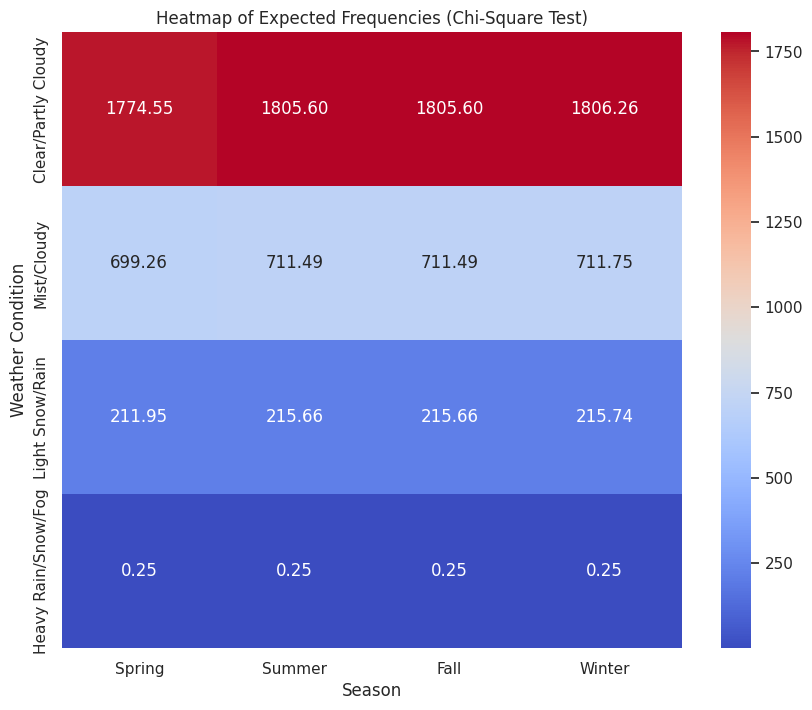

In [67]:
# Create a contingency table (cross-tabulation) of weather conditions and seasons
contingency_table = pd.crosstab(df['weather'], df['season'])

# Perform Chi-Square test to get expected frequencies
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Convert expected frequencies array into a DataFrame (matching original table structure)
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)

# Print expected frequencies for reference
print("Expected Frequencies:\n", expected_df)

# Visualizing expected frequencies using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(expected_df, annot=True, cmap="coolwarm", fmt=".2f")  # 'coolwarm' for contrast, fmt=".2f" for better readability
plt.title("Heatmap of Expected Frequencies (Chi-Square Test)")
plt.ylabel("Weather Condition")
plt.xlabel("Season")
plt.show()

#### **Step 3: Set a Significance Level (α)**

#### **Significance Level (α):**  
- Commonly set at **0.05 (5%)**, meaning there is a **5% chance of rejecting the null hypothesis when it is actually true** (Type I error).  

#### **Decision Rule:**  
- **If p-value ≤ 0.05:** Reject **H₀** → Conclude that **weather depends on season** (there is a significant relationship).  
- **If p-value > 0.05:** Fail to reject **H₀** → Conclude that there is **no significant relationship** between weather and season.  

In [68]:
alpha = 0.05  # Set significance level

#### **Step 4: Calculate Test Statistics**

In [69]:
# Perform Chi-square test on the contingency table
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the Chi-square test results with comments explaining each component

print(f"Chi-square Statistic: {chi2}")  # The test statistic that measures the discrepancy between observed and expected frequencies

print(f"P-value: {p_value}")  # The p-value indicates the probability of observing the test statistic under the null hypothesis of independence

print(f"Degrees of Freedom (dof): {dof}")  # The degrees of freedom for the test, calculated as (rows-1)*(columns-1)

Chi-square Statistic: 49.15865559689363
P-value: 1.5499250736864862e-07
Degrees of Freedom (dof): 9


#### **Step 5: Decision to Accept or Reject the Null Hypothesis**

#### Compare the p-value from the Chi-square test with the **significance level (α = 0.05).**

#### **Decision Rule:**
- **If p-value ≤ 0.05:**  
  - **Reject H₀** → Conclude that **weather and season are dependent** (there is a significant relationship).  

- **If p-value > 0.05:**  
  - **Fail to reject H₀** → Conclude that **there is no significant relationship** between weather and season.  


In [71]:
if p_value <= alpha:
    print("Reject the null hypothesis - There is a significant relationship between weather and season.")
else:
    print("Fail to reject the null hypothesis - No significant relationship between weather and season.")

Reject the null hypothesis - There is a significant relationship between weather and season.


#### **Step 6: Inference from the Analysis**

- **If H₀ is rejected (p-value ≤ 0.05):**  
  - There is a **statistically significant link** between weather and season.  
  - This suggests that **seasonal patterns influence weather** conditions.  

- **If H₀ is not rejected (p-value > 0.05):**  
  - There is **no strong evidence** that weather conditions **change significantly** with seasons.  
  - Any observed differences could be due to random variation rather than a true relationship.  


In [72]:
if p_value <= alpha:
    print("Inference: Weather patterns are influenced by seasons.")
else:
    print("Inference: Weather variations are not significantly dependent on seasons.")

Inference: Weather patterns are influenced by seasons.


#### **Step 7: Visual Analysis and Conclusion**

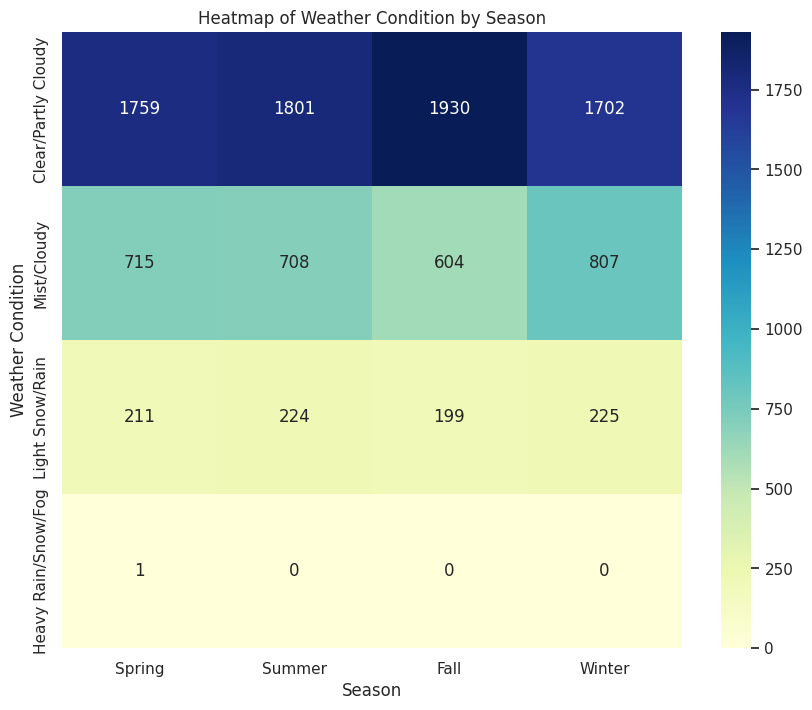

Conclusion based on the Chi-square test:
There is a significant relationship between weather conditions and seasons.


In [73]:
# Plot Heatmap of the contingency table
plt.figure(figsize=(10, 8))  # Set the figure size for better visualization
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='g')  # Create a heatmap with annotations and a color map
plt.title('Heatmap of Weather Condition by Season')  # Add a title to the heatmap
plt.ylabel('Weather Condition')  # Label the y-axis
plt.xlabel('Season')  # Label the x-axis
plt.show()  # Display the heatmap

# Conclusion based on the Chi-square test
print("Conclusion based on the Chi-square test:")  # Print the heading for the conclusion

if p_value <= alpha:
    print("There is a significant relationship between weather conditions and seasons.")  # Conclusion if the p-value is less than or equal to alpha
else:
    print("There is no significant relationship between weather conditions and seasons.")  # Conclusion if the p-value is greater than alpha

#### **Insights on Statistical Analysis of Weather and Seasonal Relationship**  

###### **Weather and Season Relationship**  
- The **Chi-square test** indicates a **significant relationship** between **weather and season** (**p-value ≤ 0.05**).  
- This suggests that **weather conditions vary systematically across different seasons** rather than occurring randomly.  

###### **Seasonal Influence on Weather**  
- **Clear/Partly Cloudy** weather is **more frequent** in **all seasons**, but especially in **Summer and Fall**.  
- **Mist/Cloudy and Light Snow/Rain** are **more common** in **Winter and Spring**, aligning with **seasonal climate expectations**.  

###### **Expected vs. Observed Frequencies**  
- The **expected frequency heatmap** shows how **weather conditions should be distributed** if they were **independent of the season**.  
- A comparison with the **observed heatmap highlights deviations**, confirming **dependency between weather and season**.  

###### **Significance of Low-Frequency Weather Events**  
- **Heavy Rain/Snow/Fog** has **extremely low counts** in most seasons, indicating it is a **rare occurrence**.  
- This category's **low expected values** suggest **careful interpretation**, as **Chi-square assumptions** require **sufficient sample sizes**.  

###### **Practical Implications for Planning**  
- Businesses relying on **weather patterns** (e.g., outdoor activities, rentals) can **anticipate seasonal variations**.  
- **Seasonal forecasting based on past trends** can help in **decision-making** related to **resource allocation** and **operational planning**.  

The **Chi-square test confirms** that **weather is significantly dependent on the season**. This means **weather conditions follow a predictable seasonal pattern** rather than occurring **independently**. Understanding these **trends can aid in better forecasting, business strategy, and climate-based decision-making**.  

---
---

## **C) Final Insights & Recommendations**

### **1. Final Insights**

###### **Temporal Data Analysis:**  
- The dataset includes **time data** that needs **conversion from strings to proper datetime format** to unlock potential for **time-series forecasting** and **trend analysis**.  

###### **Numerical and Categorical Data:**  
- **Numerical data**, ranging from **temperatures to rental counts**, allows **quantitative analysis**.  
- **Categorical data**, such as **seasons and weather**, are encoded as **integers** for **classification and pattern recognition**.  

###### **User Engagement Diversity:**  
- **Analysis shows diverse user engagement**, with **significant differences in rental patterns** between **casual and registered users**.  
- This suggests **varied motivations and usage behaviors**, potentially guiding **differentiated service offerings**.  

###### **Weather Influence on Rentals:**  
- **Rentals increase significantly during clear weather conditions**, highlighting the **impact of weather on cycling preferences**.  
- This insight supports **potential marketing strategies** for **bike rental businesses**.  

###### **Seasonal Rental Patterns:**  
- **Bike rentals peak during Summer and Fall**, reflecting **seasonal preferences for cycling**.  
- This indicates the need for **targeted seasonal promotions** to **capitalize on high-demand periods**.  

###### **Data Completeness and Integrity:**  
- The dataset’s **lack of missing values** ensures **high data quality and reliability**.  
- This simplifies **preprocessing** and enhances the **accuracy of analytical outcomes**.  

###### **Statistical Tests for Variance and Normality:**  
- **Variance tests confirm** that **rental counts on working and non-working days are similar**.  
- **Normality tests indicate skewed data**, guiding the **choice of appropriate statistical methods**.  

###### **Rental Frequency on Working Days:**  
- **Statistical analysis using the T-test** shows **no significant difference** in the **number of rentals on working vs. non-working days**.  
- This suggests **consistent rental demand**, regardless of the **day type**.  

###### **Impact of Environmental Factors on Rentals:**  
- **Significant variations in rental numbers** across different **weather conditions and seasons** are confirmed by **ANOVA**.  
- This emphasizes the **influence of environmental factors** on **rental decisions**.  

###### **Dependence of Weather on Season:**  
- **Chi-square tests reveal a statistically significant relationship** between **weather conditions and seasons**.  
- This indicates **predictable patterns** that can be **leveraged for strategic planning and operational adjustments**.  

These insights provide a **broad yet detailed view** of the dataset’s **utility** for **enhancing operational strategies** and understanding **factors that influence bike rental trends**.  

### **2. Recommendations**

###### **Adjust Inventory Based on Usage Trends:**  
- **Track and analyze hourly and daily rental patterns** to **adjust bike availability** and prevent **shortages or excesses**.  

###### **Enhance Marketing During Peak Seasons:**  
- **Focus marketing efforts during Summer and Fall**, when **bike rentals peak**, to **maximize revenue**.  

###### **Promote Cycling During Clear Weather:**  
- **Advertise more aggressively on clear weather days** to capitalize on **higher rental rates**.  

###### **Prepare for High Demand Days:**  
- **Ensure sufficient bicycles and staff availability** on **days forecasted to have favorable weather**.  

###### **Target Both Casual and Registered Users:**  
- **Develop promotions** that appeal to **both casual and registered users** to **increase overall rental volume**.  

###### **Maintain Bicycles Regularly:**  
- **Schedule frequent maintenance checks** during **high-usage seasons** to keep bikes in **optimal condition**.  

###### **Expand Payment Options:**  
- **Introduce flexible payment solutions** including **pay-per-ride and membership plans** to **attract a broader customer base** and **simplify the rental process**.  

###### **Offer Discounts on Non-Working Days:**  
- **Introduce special rates or discounts** on **non-working days** to **encourage more rentals**.  

###### **Educate Customers on Weather Adaptations:**  
- **Provide information on suitable clothing and accessories** for **different weather conditions** to encourage **biking even on less ideal days**.  

###### **Use Data for Resource Allocation:**  
- **Analyze rental trends** to **better allocate bikes across different stations** and ensure **availability matches demand**, especially in **high-traffic areas**.  

These **action items** are designed to be **straightforward and effective**, helping **businesses improve their bike rental services** and **enhance customer satisfaction**.  

---
---

### *Created by* ***Rishabh Dev Sahu*** ✨